# Localized Exploratory Analysis

This exploratory analysis was done with the purpose of understanding the behavior of the meteorological variables with the Dengue variables in a specific municipality. It is worth noting that the files read in this notebook have already been preprocessed. And this notebook is designed to receive any municipality and run the analysis for the given municipality without much change to the code.

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import seaborn as sns
sns.set_style("ticks")
import pandas as pd
from datetime import datetime
import glob
import os

In [ ]:
df = pd.read_csv("local/data/santamarta_consolidado_2008_2020.csv", index_col = 0, parse_dates= True)

In [ ]:
df.columns

Index(['COD_DPTO', 'COD_MUNICIPIO', 'POBLACION', 'ANO', 'SEMANA',
       'PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE'],
      dtype='object')

In [ ]:
municipality = "Santa Marta"

In [ ]:
def plot_time_series(dates_array, values_array,  labels, colors, title, x_label, y_label, kind = "lineplot", fulldates = False):
    """
    Function to plot time series: 
    
    dates: must be an array of datetime series for the x axis
    values: the array of y axis values to plot
    labels: the array of labels for each plot
    title: string that goes above the plot
    x_label: string that goes on the x-axis
    y_label: string that goes on the y-axis
    kind: the type of the graph
    fulldates: if the plot is going to receive full dates or just numbers.
    """
    years_locator = mdates.YearLocator()
    months_locator = mdates.MonthLocator()
    years_format = mdates.DateFormatter('%Y')
    sns.set_style('ticks')
    fig, ax = plt.subplots(1,1, figsize=(12,5), dpi = 150)

    ax.ticklabel_format(axis='y', style='plain')
    if fulldates:
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        ax.xaxis.set_major_locator(years_locator)
        ax.xaxis.set_major_formatter(years_format)
        ax.xaxis.set_minor_locator(months_locator)
    
    for i in range(len(dates_array)):
        if kind == "lineplot":
            sns.lineplot(x=dates_array[i], y=values_array[i],  label = labels_array[i], color = colors[i], ax = ax)

    rotation = 45
    plt.setp(ax.get_xticklabels(), rotation=rotation)
    plt.xlabel(x_label, fontsize='16')
    plt.ylabel(y_label, fontsize='16')
    plt.title(title, fontsize='18')

    plt.show()

# TEMPERATURE PLOTS

The temperature variable must always looked at in 3 different forms, the maximum, minimum and mean temperature. 

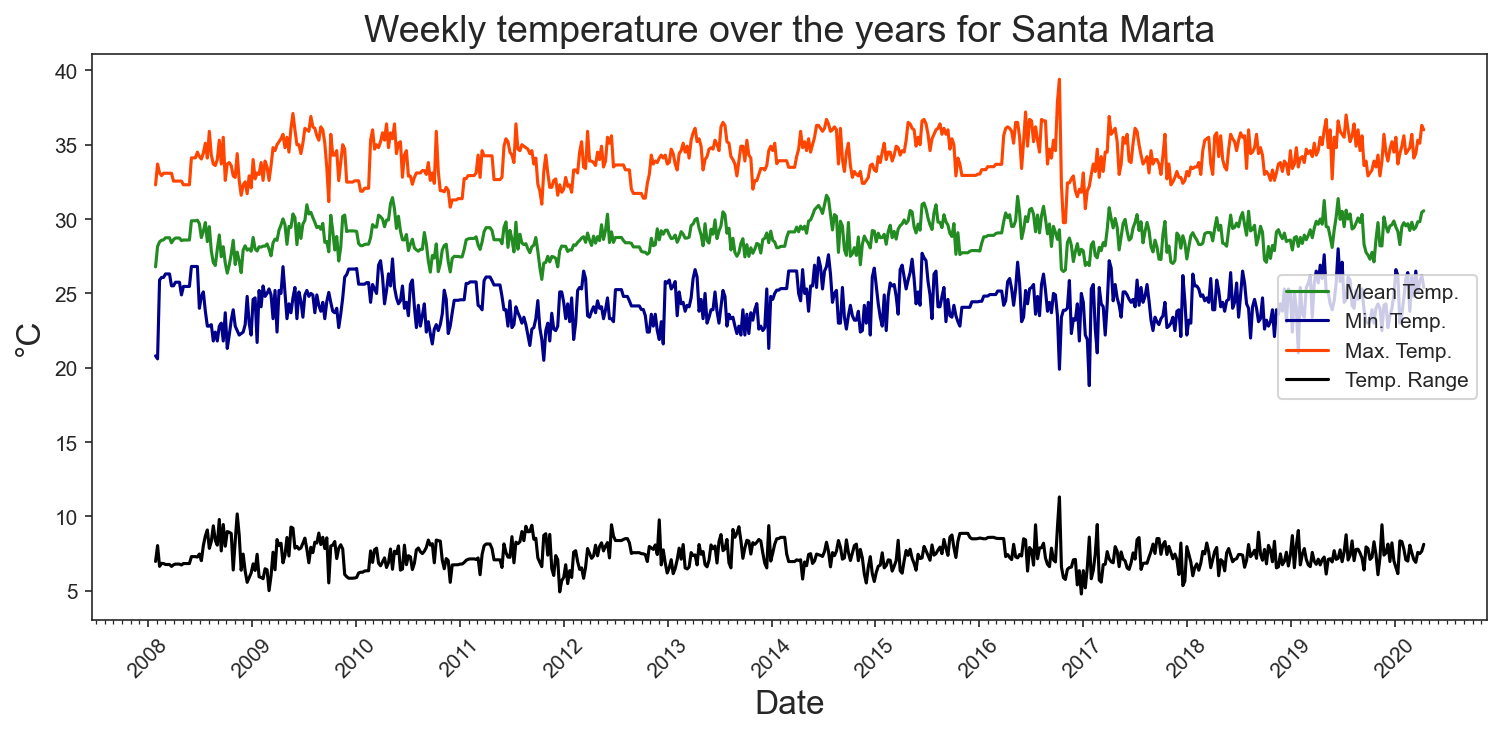

In [ ]:
x_array = [df.index]*4
y_array = [df["TEMPERATURE_MEAN"], df["TEMPERATURE_AMIN"],df["TEMPERATURE_AMAX"] , df["TEMPERATURE_RANGE"]]
labels_array = ["Mean Temp.", "Min. Temp.", "Max. Temp." , "Temp. Range"]
colors = ["forestgreen","darkblue","orangered","black"]
title = "Weekly temperature over the years for " + municipality
ylabel = "°C"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = True)

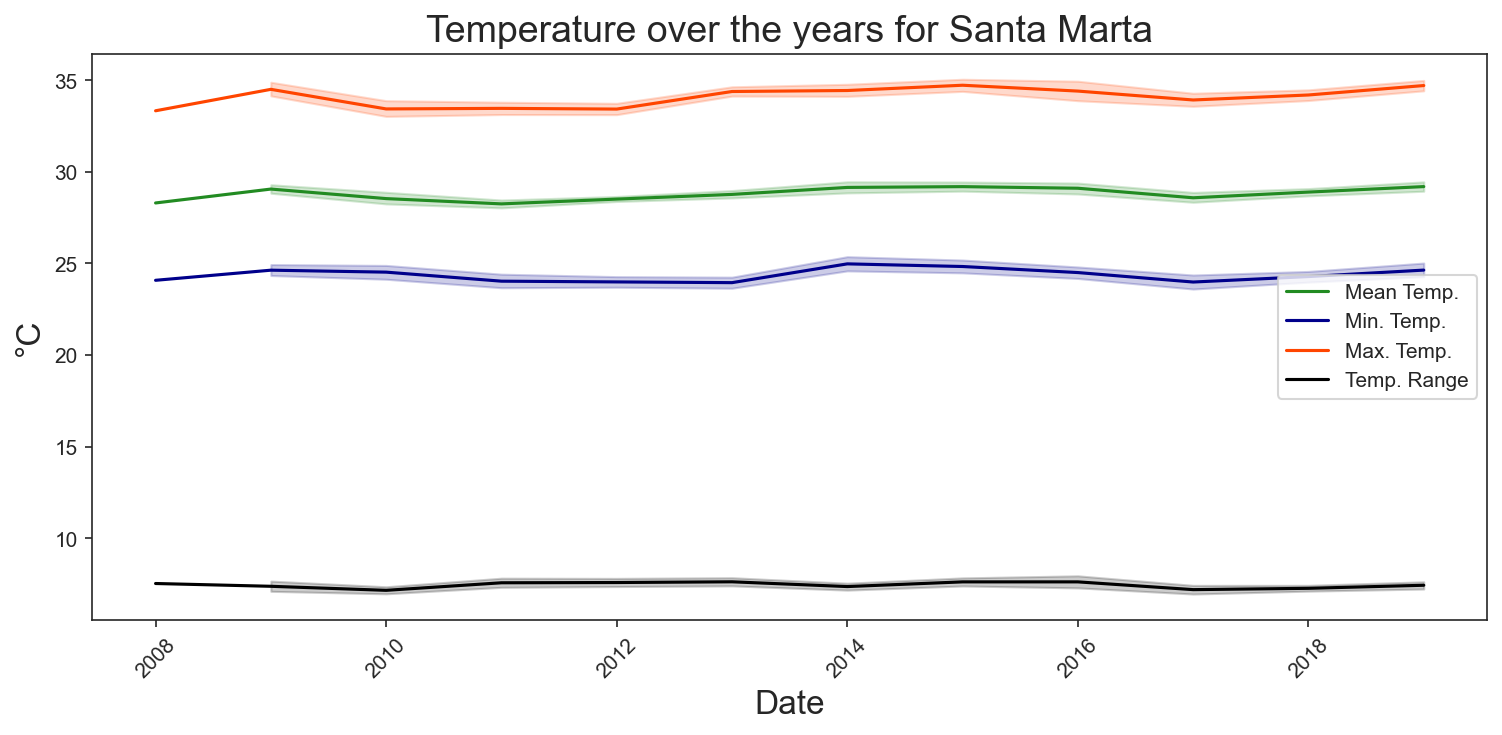

In [ ]:
df_filt = df[(df["ANO"]>=2007) & (df["ANO"]<=2019)]
x_array = [df_filt["ANO"]]*4
y_array = [df_filt["TEMPERATURE_MEAN"], df_filt["TEMPERATURE_AMIN"],df_filt["TEMPERATURE_AMAX"] , df_filt["TEMPERATURE_RANGE"]]
labels_array = ["Mean Temp.", "Min. Temp.", "Max. Temp." , "Temp. Range"]
colors = ["forestgreen","darkblue","orangered","black"]
title = "Temperature over the years for " + municipality
ylabel = "°C"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array,colors,title,  xlabel,ylabel, "lineplot")

Text(0.5, 0, 'Month')

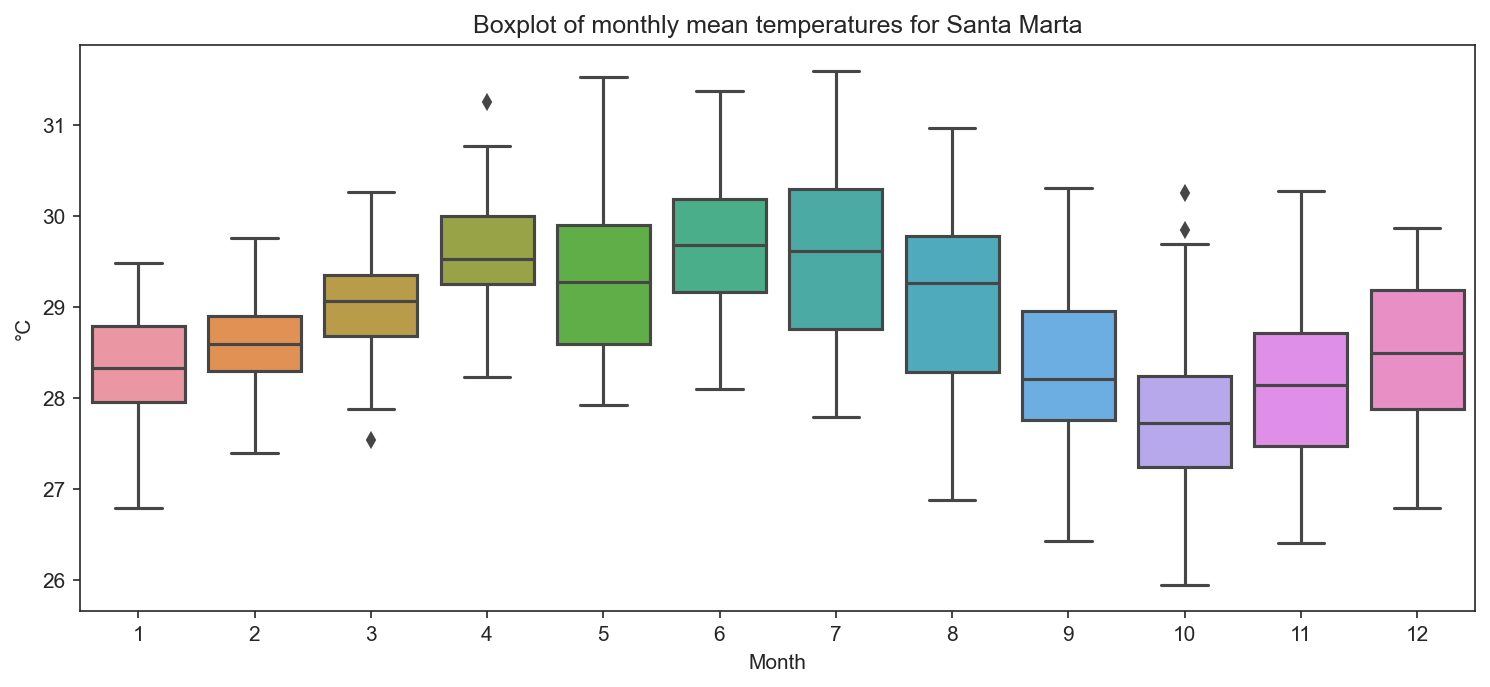

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["TEMPERATURE_MEAN"])
axes.set_title("Boxplot of monthly mean temperatures for " + municipality)
axes.set_ylabel("°C")
axes.set_xlabel("Month")

# HUMIDITY PLOTS

The humidity variable must always looked at in 3 different forms, the maximum, minimum and mean humidity. 

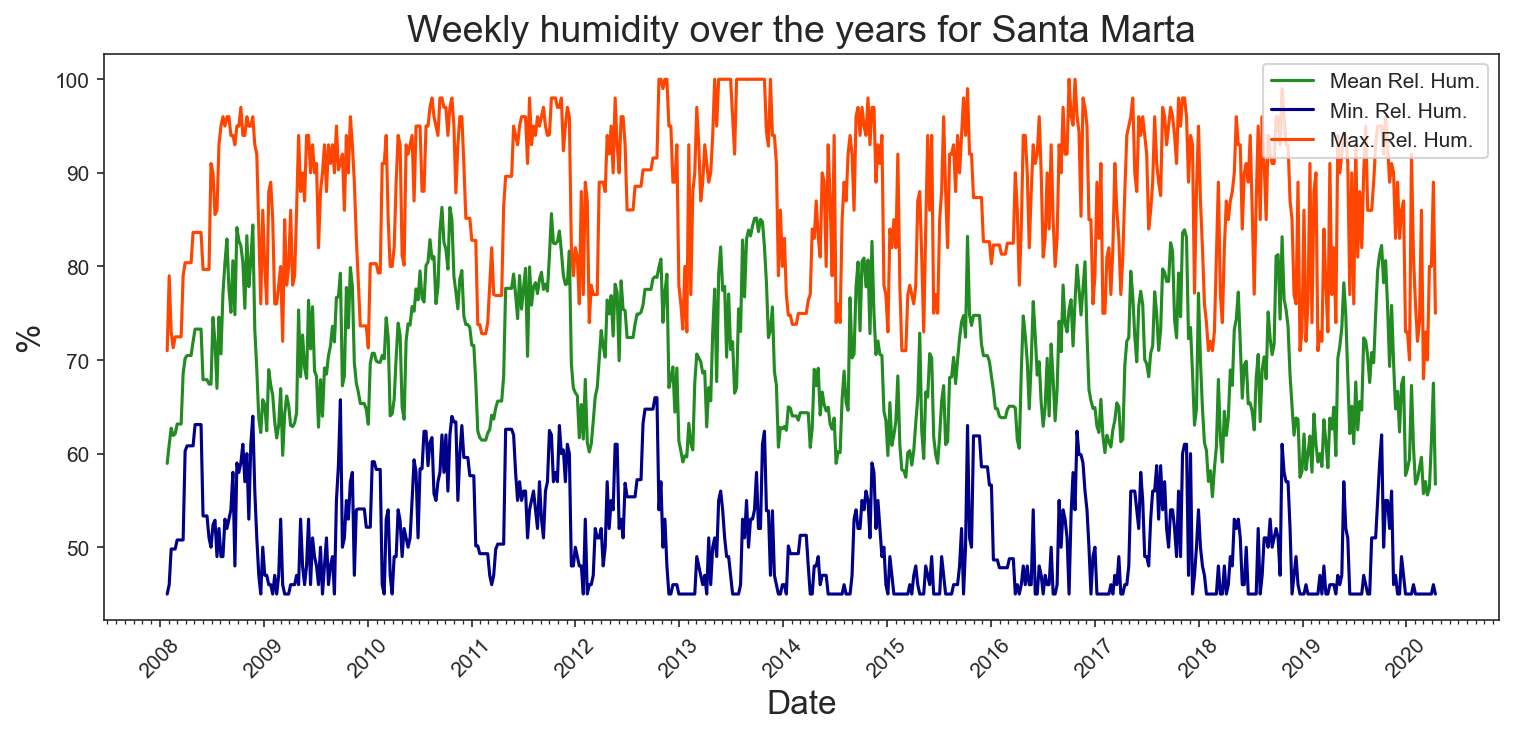

In [ ]:
x_array = [df.index]*3
y_array = [df["REL_HUMIDITY_MEAN"], df["REL_HUMIDITY_AMIN"],df["REL_HUMIDITY_AMAX"] ]
labels_array = ["Mean Rel. Hum.", "Min. Rel. Hum.", "Max. Rel. Hum."]
title = "Weekly humidity over the years for " + municipality
colors = ["forestgreen","darkblue","orangered"]
ylabel = "%"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array, colors,title,  xlabel,ylabel, "lineplot", fulldates = True)

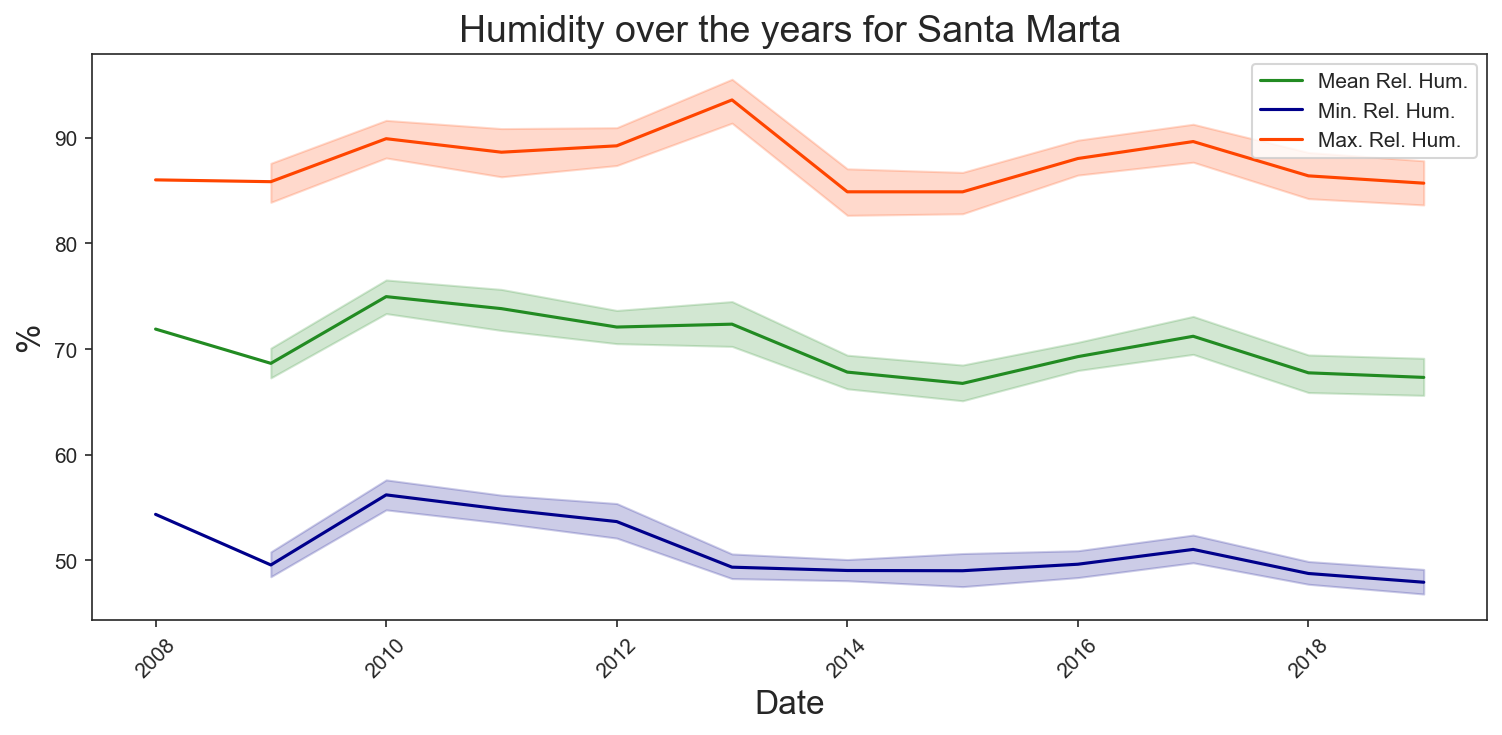

In [ ]:
x_array = [df_filt["ANO"]]*3
y_array = [df_filt["REL_HUMIDITY_MEAN"], df_filt["REL_HUMIDITY_AMIN"],df_filt["REL_HUMIDITY_AMAX"] ]
labels_array = ["Mean Rel. Hum.", "Min. Rel. Hum.", "Max. Rel. Hum."]
title = "Humidity over the years for " + municipality
ylabel = "%"
xlabel = "Date"
colors = ["forestgreen","darkblue","orangered"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = False)

Text(0.5, 0, 'Month')

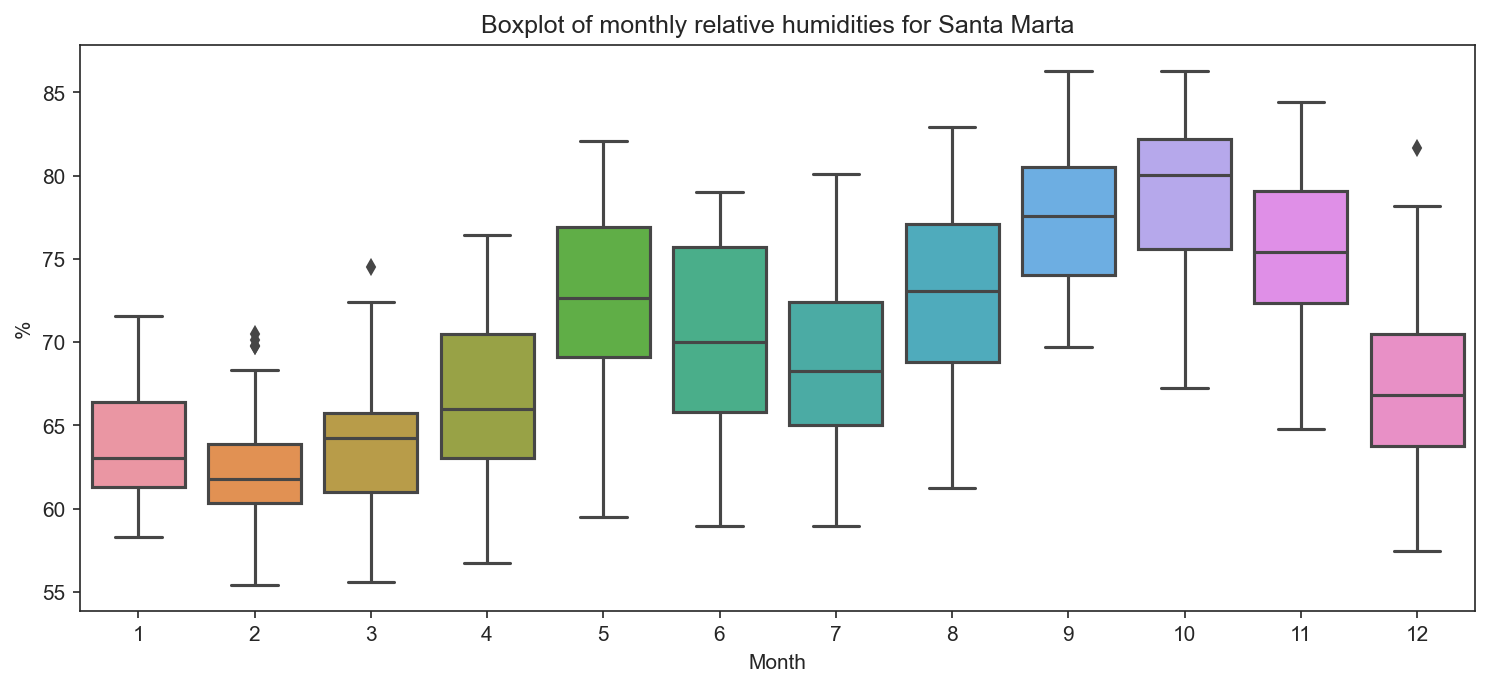

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["REL_HUMIDITY_MEAN"])
axes.set_title("Boxplot of monthly relative humidities for " + municipality)
axes.set_ylabel("%")
axes.set_xlabel("Month")

# PRECIPITATION PLOTS

The precipitation variable, due to its nature, must be analyzed as the total precipitation. The maximum and minimums in this variable do not describe the general behavior of the variable.

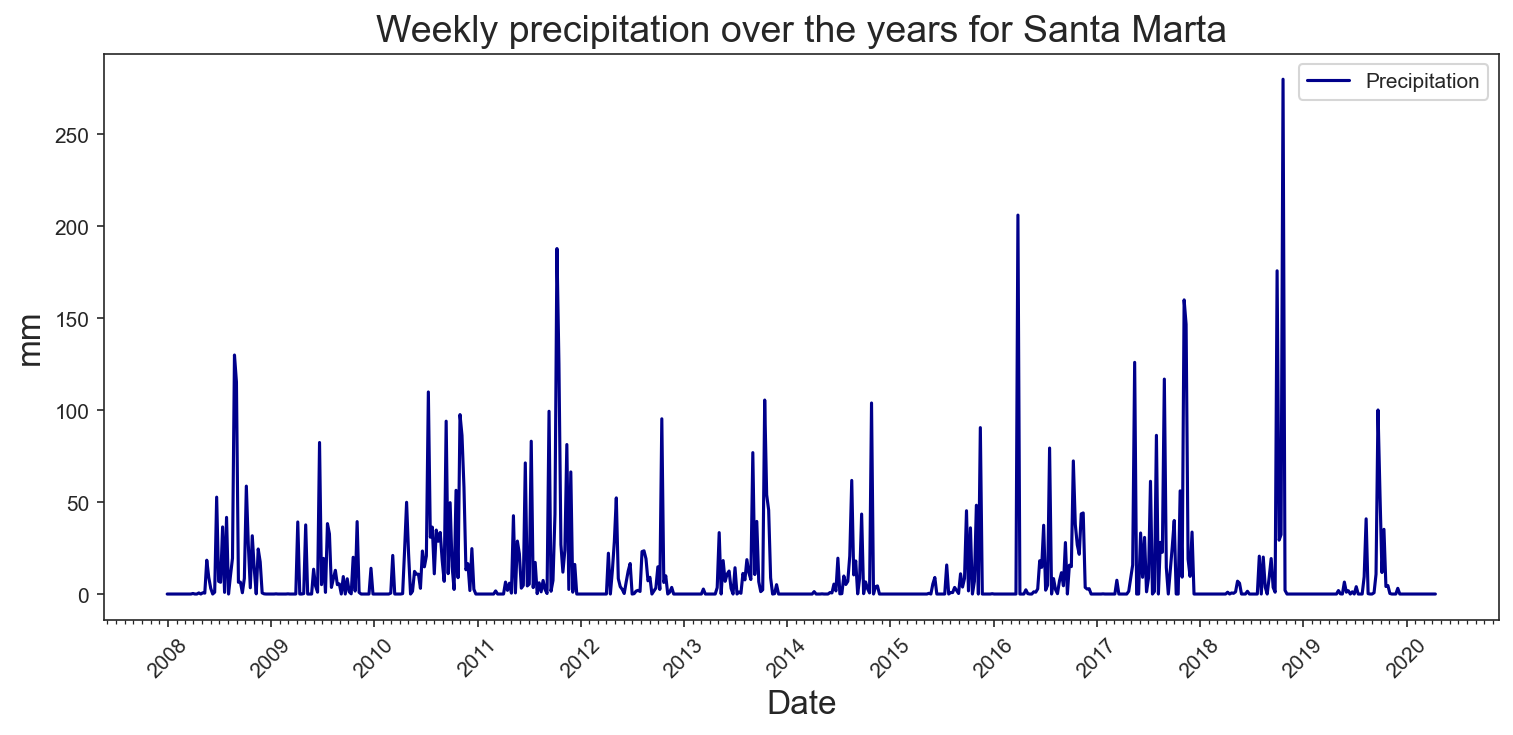

In [ ]:
x_array = [df.index]
y_array = [df["PRECIPITATION"]]
labels_array = ["Precipitation"]
title = "Weekly precipitation over the years for " + municipality
ylabel = "mm"
xlabel = "Date"
colors = ["darkblue"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = True)

Text(0.5, 0, 'Month')

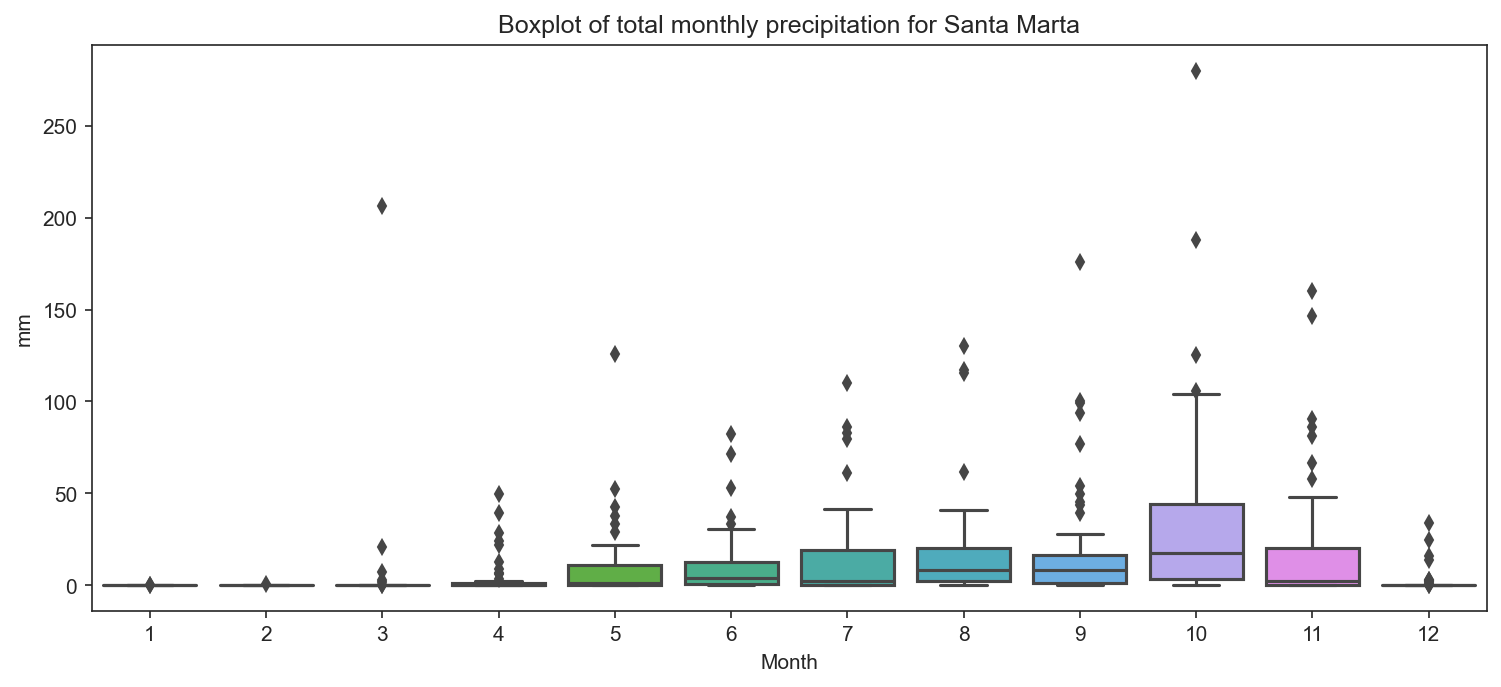

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["PRECIPITATION"])
axes.set_title("Boxplot of total monthly precipitation for " + municipality)
axes.set_ylabel("mm")
axes.set_xlabel("Month")

In [ ]:
df.columns

Index(['COD_DPTO', 'COD_MUNICIPIO', 'POBLACION', 'ANO', 'SEMANA',
       'PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE'],
      dtype='object')

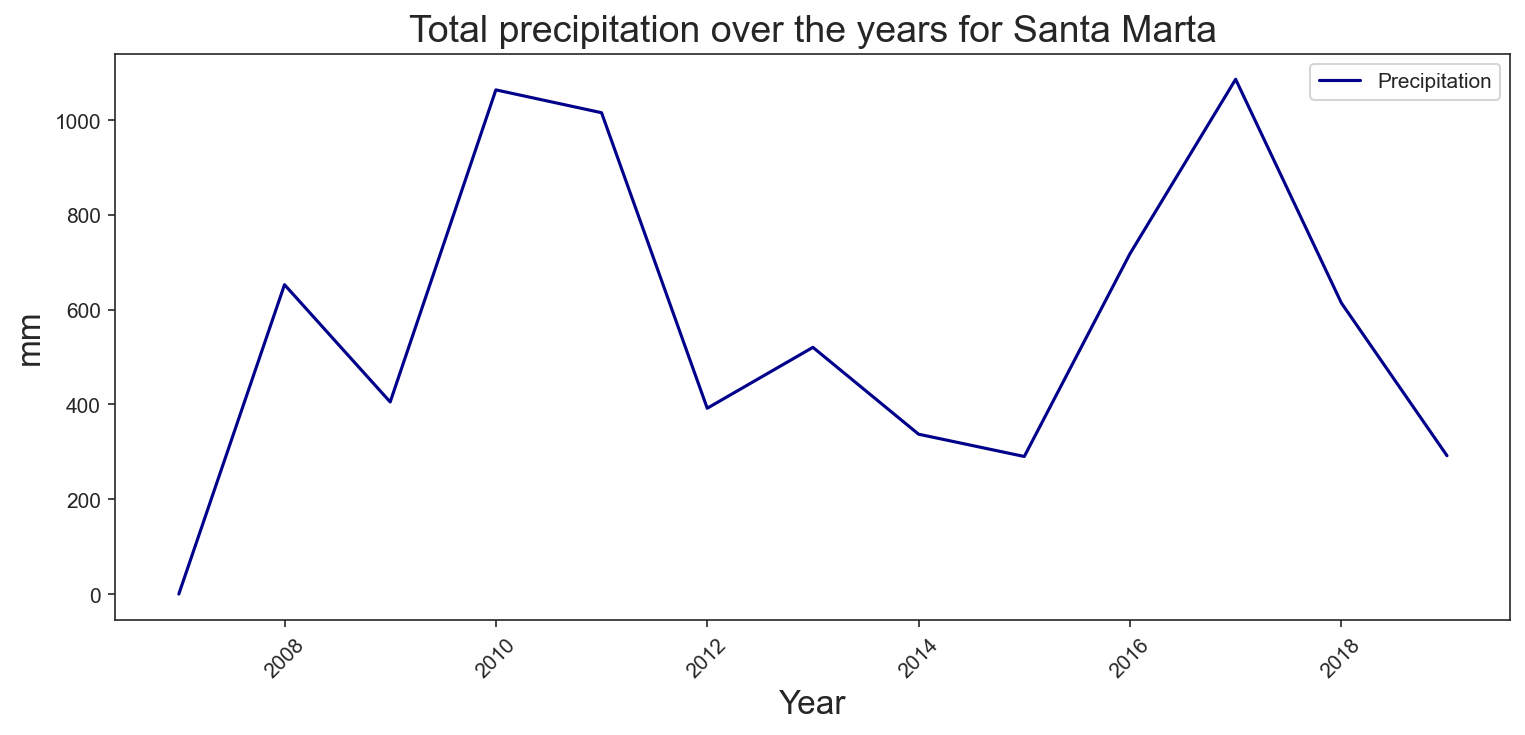

In [ ]:
df_prec_yearly = df[(df.index.year >= 2007) & (df.index.year <= 2019)]
df_prec_yearly = df_prec_yearly[["PRECIPITATION","DRY_DAYS"]]
df_prec_yearly = df_prec_yearly.groupby(df_prec_yearly.index.year).sum()
x_array = [df_prec_yearly.index]
y_array = [df_prec_yearly["PRECIPITATION"]]
labels_array = ["Precipitation"]
title = "Total precipitation over the years for " + municipality
ylabel = "mm"
xlabel = "Year"
colors = ["darkblue"]
plot_time_series(x_array, y_array, labels_array, colors, title, xlabel,ylabel, "lineplot", fulldates = False)

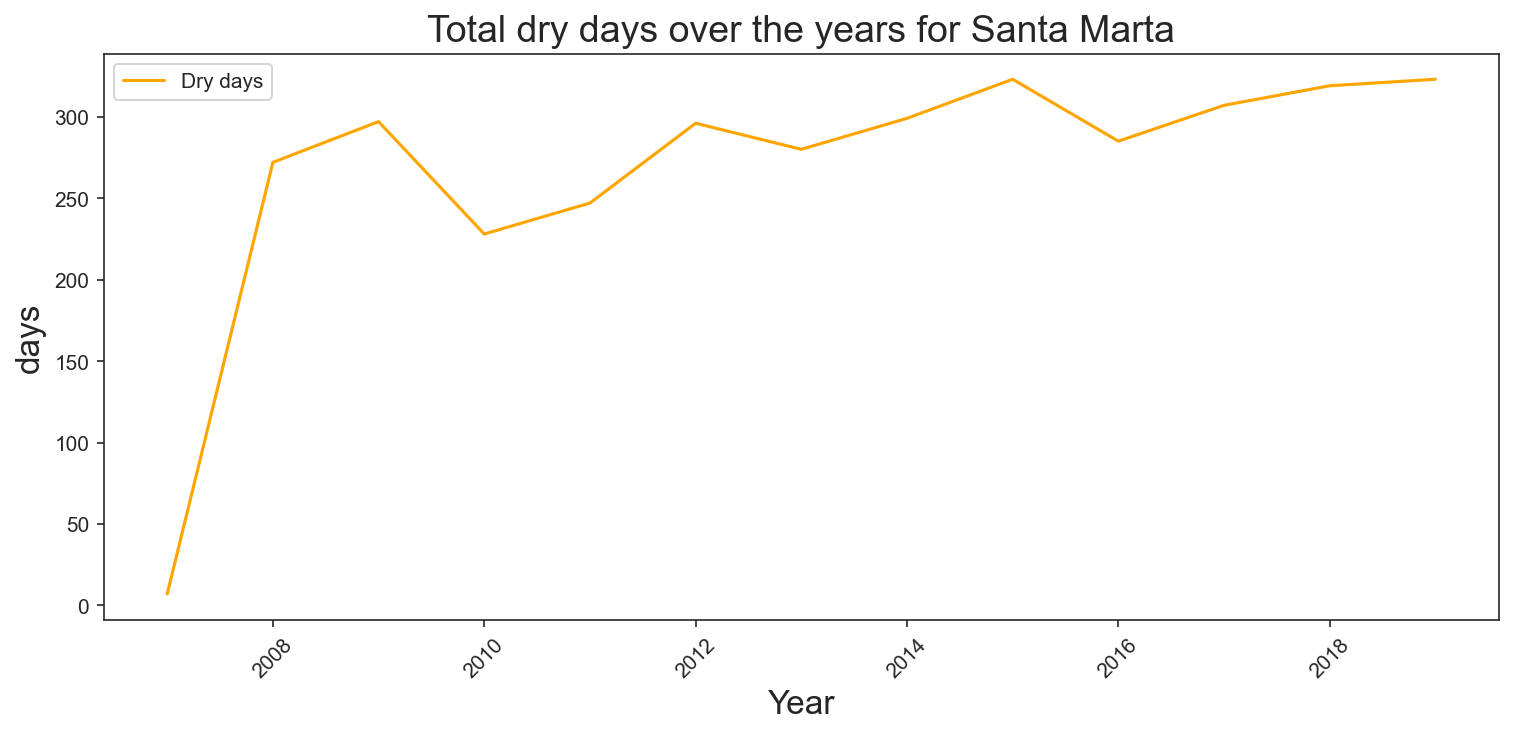

In [ ]:
x_array = [df_prec_yearly.index]
y_array = [df_prec_yearly["DRY_DAYS"]]
labels_array = ["Dry days"]
title = "Total dry days over the years for " + municipality
ylabel = "days"
xlabel = "Year"
colors = ["orange"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = False)

# NIÑO PLOTS

The Niño indexes are also very important features to analyze in this project. That is why it is interesting to analyze and understand their behavior in time series plots.

In [ ]:
df.columns

Index(['COD_DPTO', 'COD_MUNICIPIO', 'POBLACION', 'ANO', 'SEMANA',
       'PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE'],
      dtype='object')

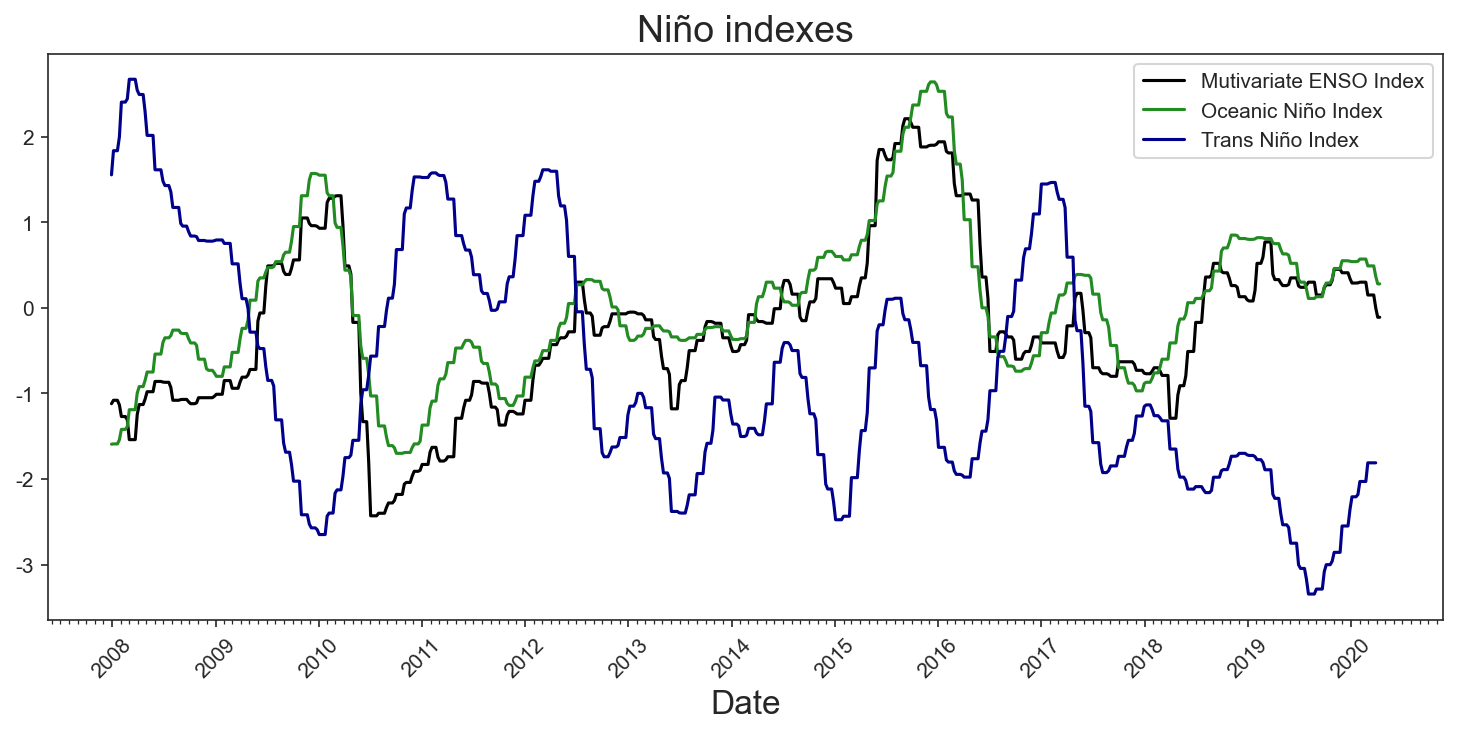

In [ ]:
x_array = [df.index]*3
y_array = [df["MEI"], df["ONI"], df["TNI"]]
labels_array = ["Mutivariate ENSO Index", "Oceanic Niño Index", "Trans Niño Index"]
colors = ["black","forestgreen","darkblue","orangered","cyan","black"]
title = "Niño indexes"
ylabel = ""
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array,colors,title,  xlabel,ylabel, "lineplot", fulldates = True)

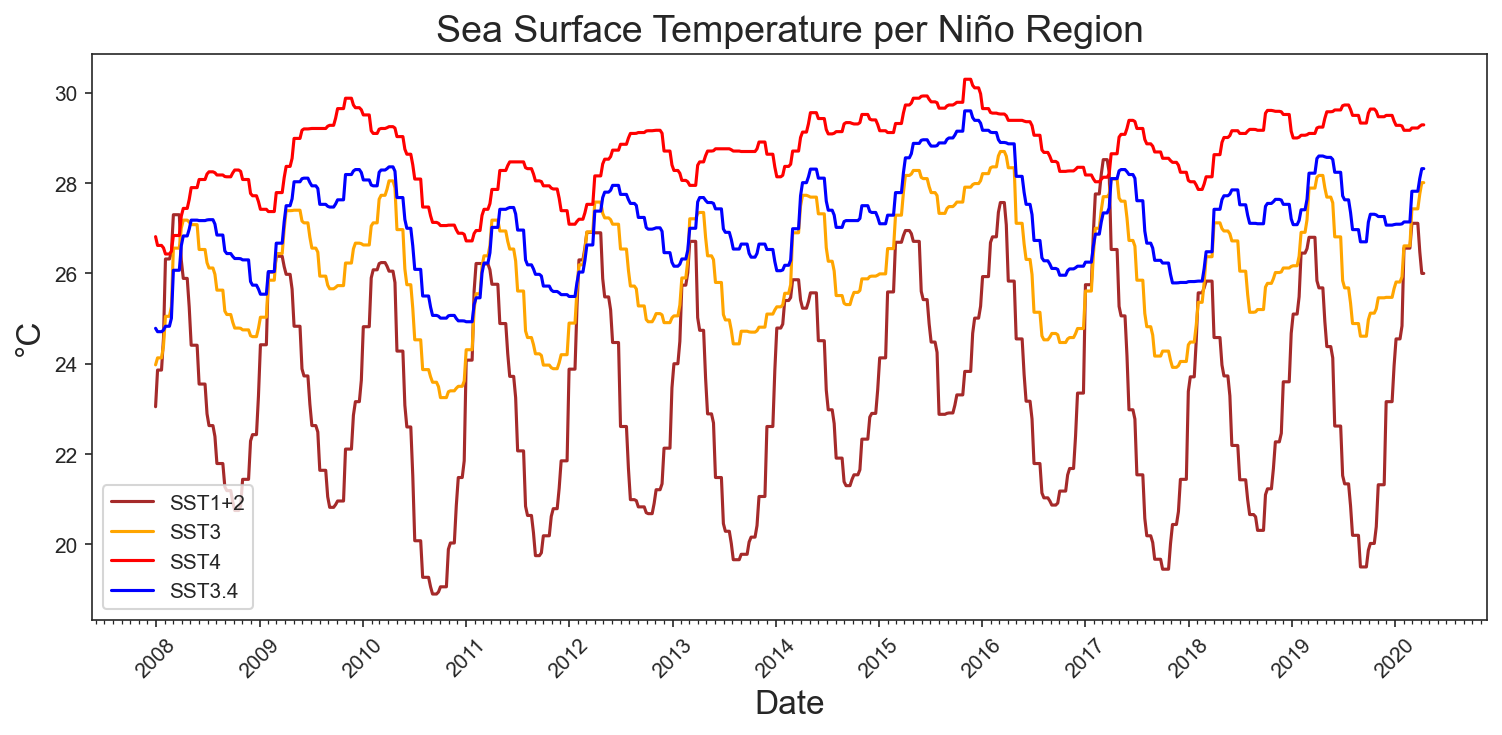

In [ ]:
x_array = [df.index]*4
y_array = [df["SST1+2"], df["SST3"], df["SST4"], df["SST3.4"]]
labels_array = ["SST1+2", "SST3", "SST4", "SST3.4"]
colors = ["brown","orange","red","blue"]
title = "Sea Surface Temperature per Niño Region"
ylabel = "°C"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array,colors,title,  xlabel,ylabel, "lineplot", fulldates = True)

# DENGUE PLOTS

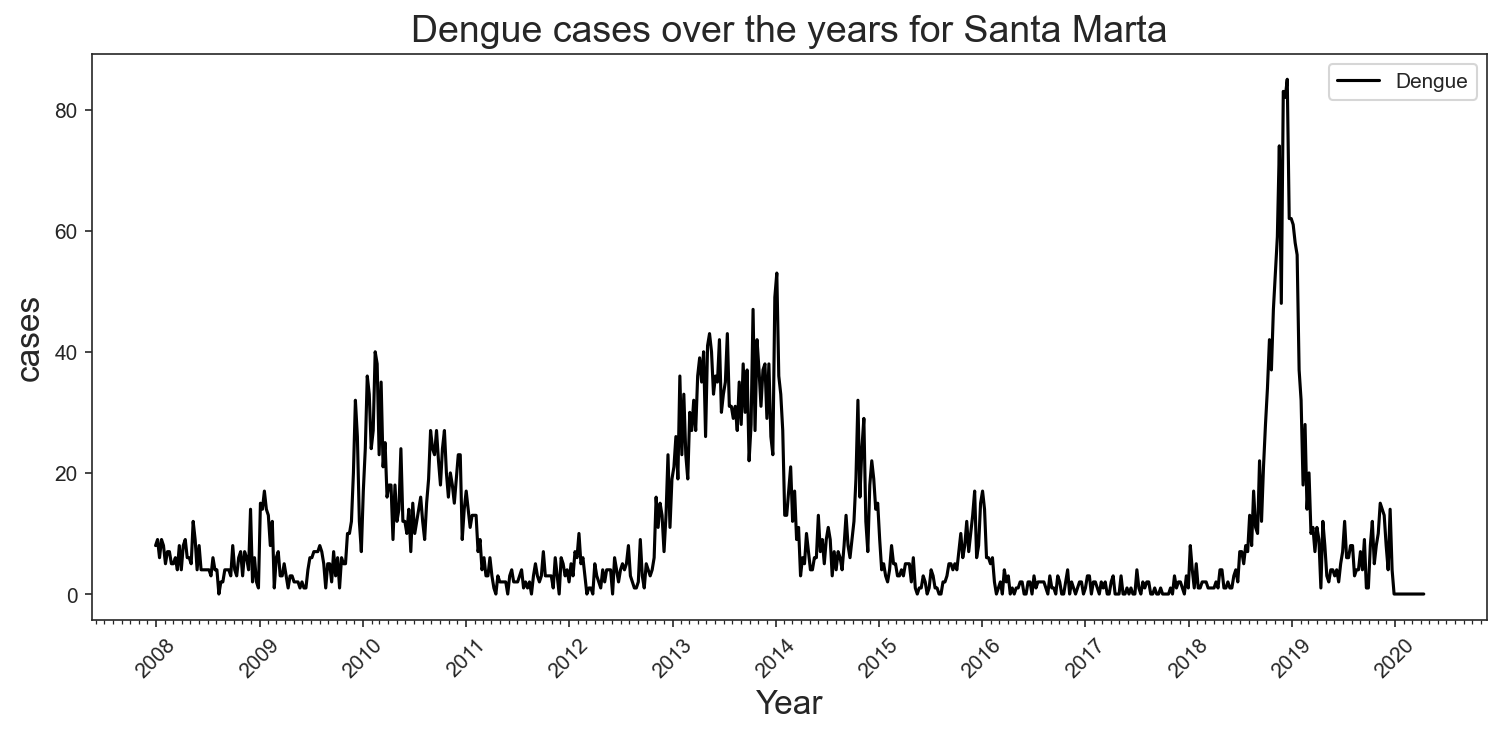

In [ ]:
x_array = [df.index]
y_array = [df["DENGUE"]]
labels_array = ["Dengue"]
title = "Dengue cases over the years for " + municipality
ylabel = "cases"
xlabel = "Year"
colors = ["black"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = True)


Text(0.5, 0, 'Month')

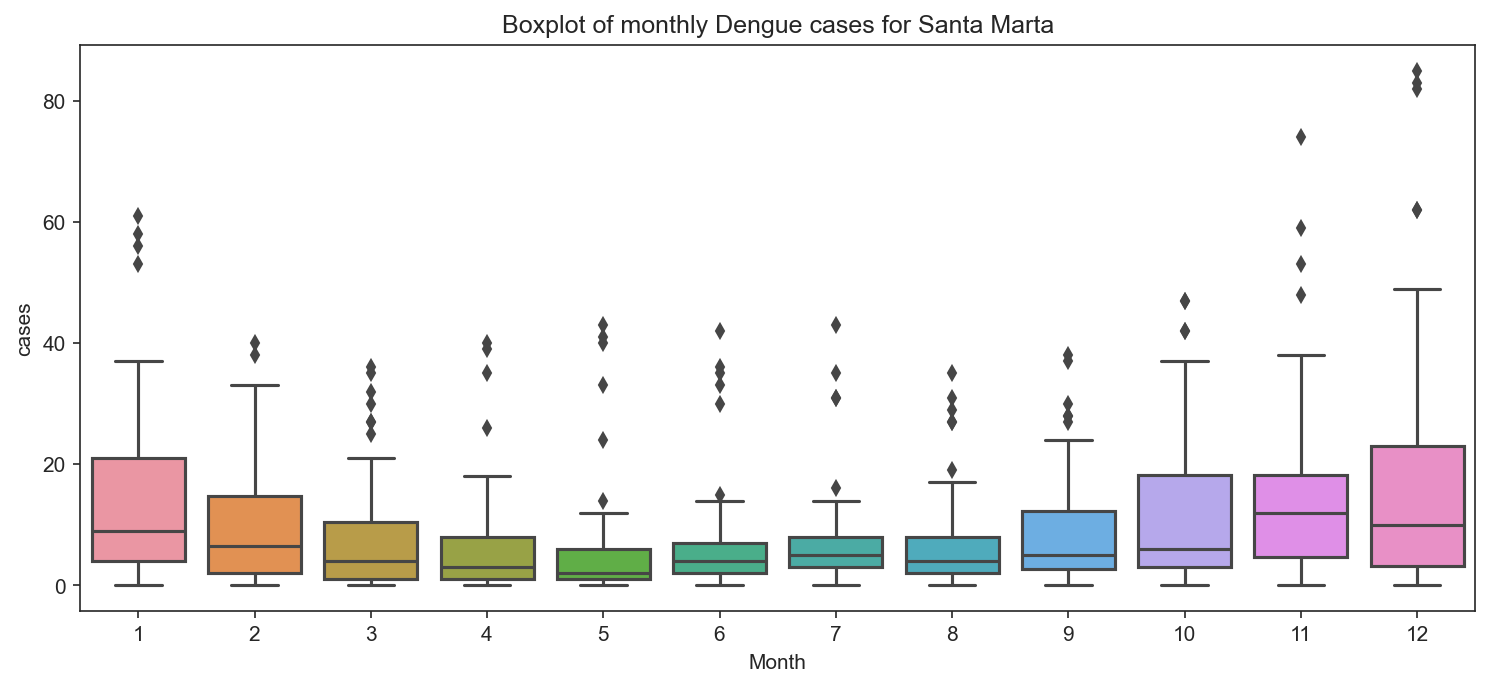

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["DENGUE"])
axes.set_title("Boxplot of monthly Dengue cases for " + municipality)
axes.set_ylabel("cases")
axes.set_xlabel("Month")

## BOXPLOTS FOR UNDERSTANDING THE BEHAVOIR OF EACH VARIABLE THROUGH TIME

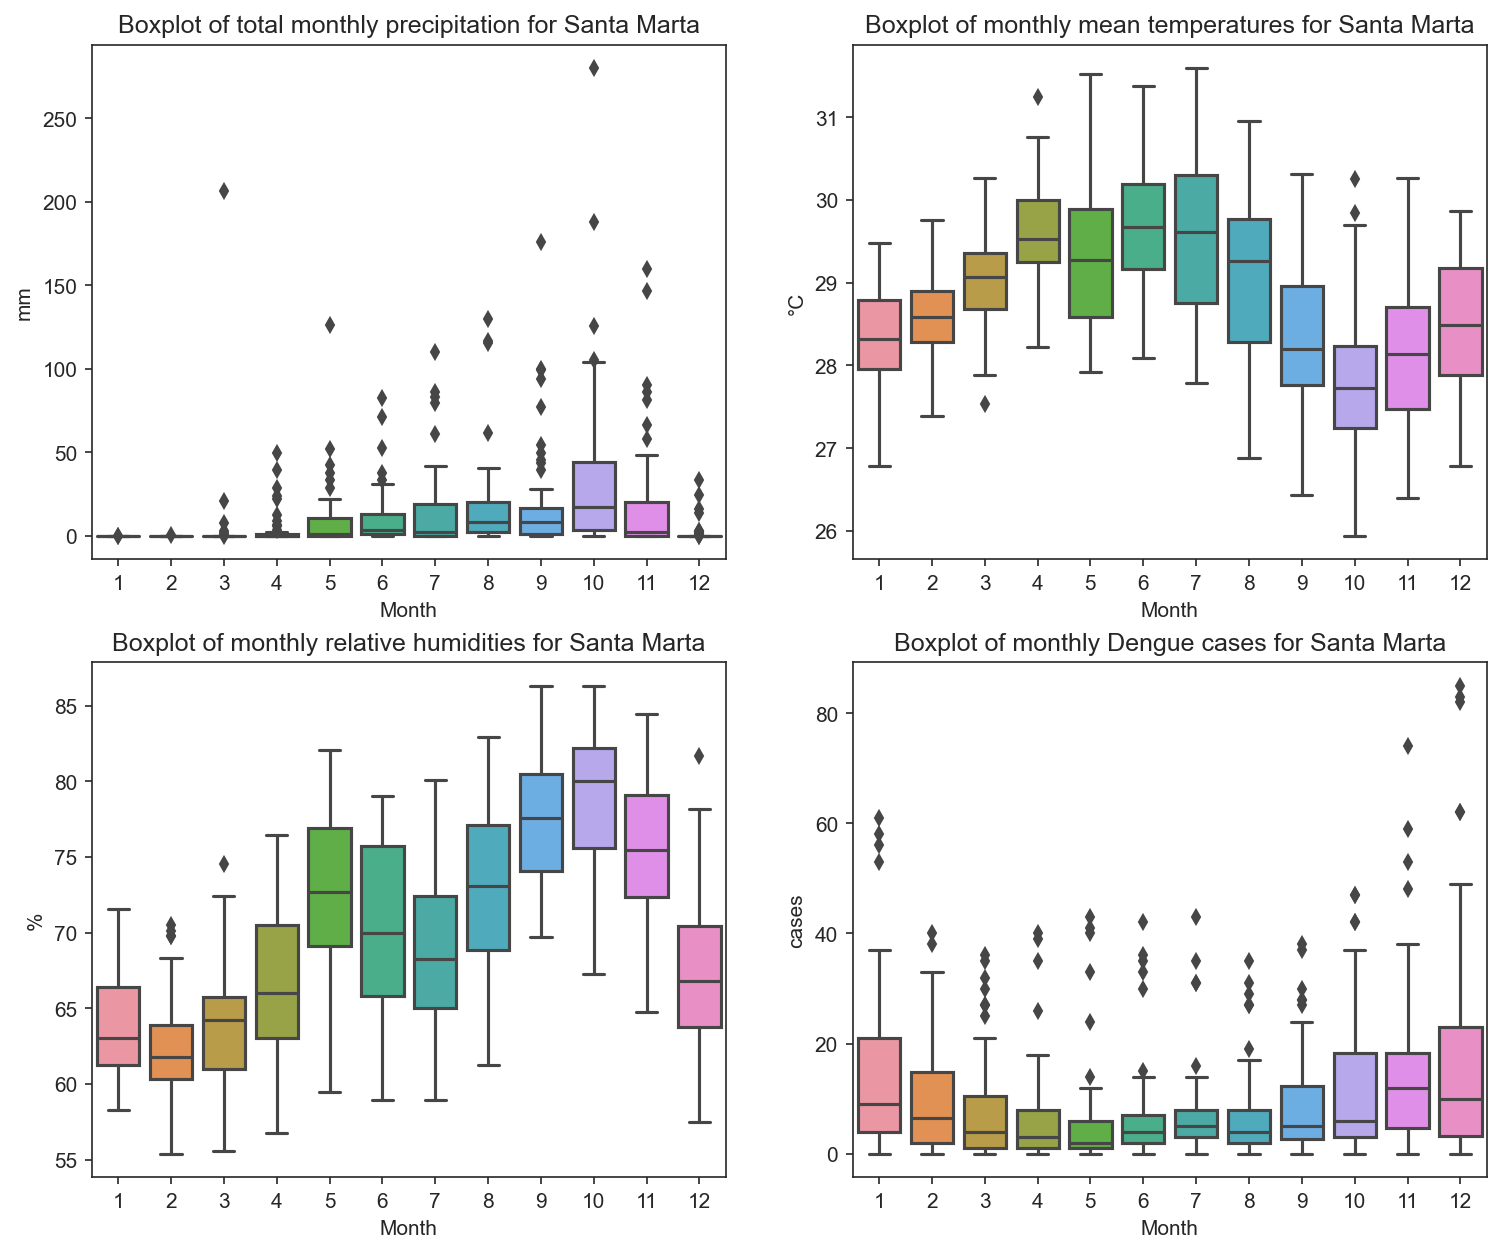

In [ ]:
cols = ['PRECIPITATION', 'TEMPERATURE_MEAN', 'REL_HUMIDITY_MEAN', 'DENGUE']
titles = ["Boxplot of total monthly precipitation for ", 
          "Boxplot of monthly mean temperatures for ",
          "Boxplot of monthly relative humidities for ",
          "Boxplot of monthly Dengue cases for "]
ylables = ['mm', '°C', '%', 'cases']

fig, ax = plt.subplots(figsize=(12, 10), dpi = 150)

for i, col in enumerate(cols):
    plt.subplot(2,2, i+1)
    sns.boxplot(x=df.index.month, y=df[col]).set_title(titles[i] + municipality)
    plt.ylabel(ylables[i])
    plt.xlabel("Month")

# SIMPLE CORRELATION BETWEEN ALL VARIABLES

Some of the variables do not have to be in the correlation matrix. That's why they are removed from the beginning.

In [ ]:
df_for_corr = df.drop(columns=['COD_DPTO',"COD_MUNICIPIO","POBLACION", "DENGUE GRAVE","MORTALIDAD POR DENGUE"])

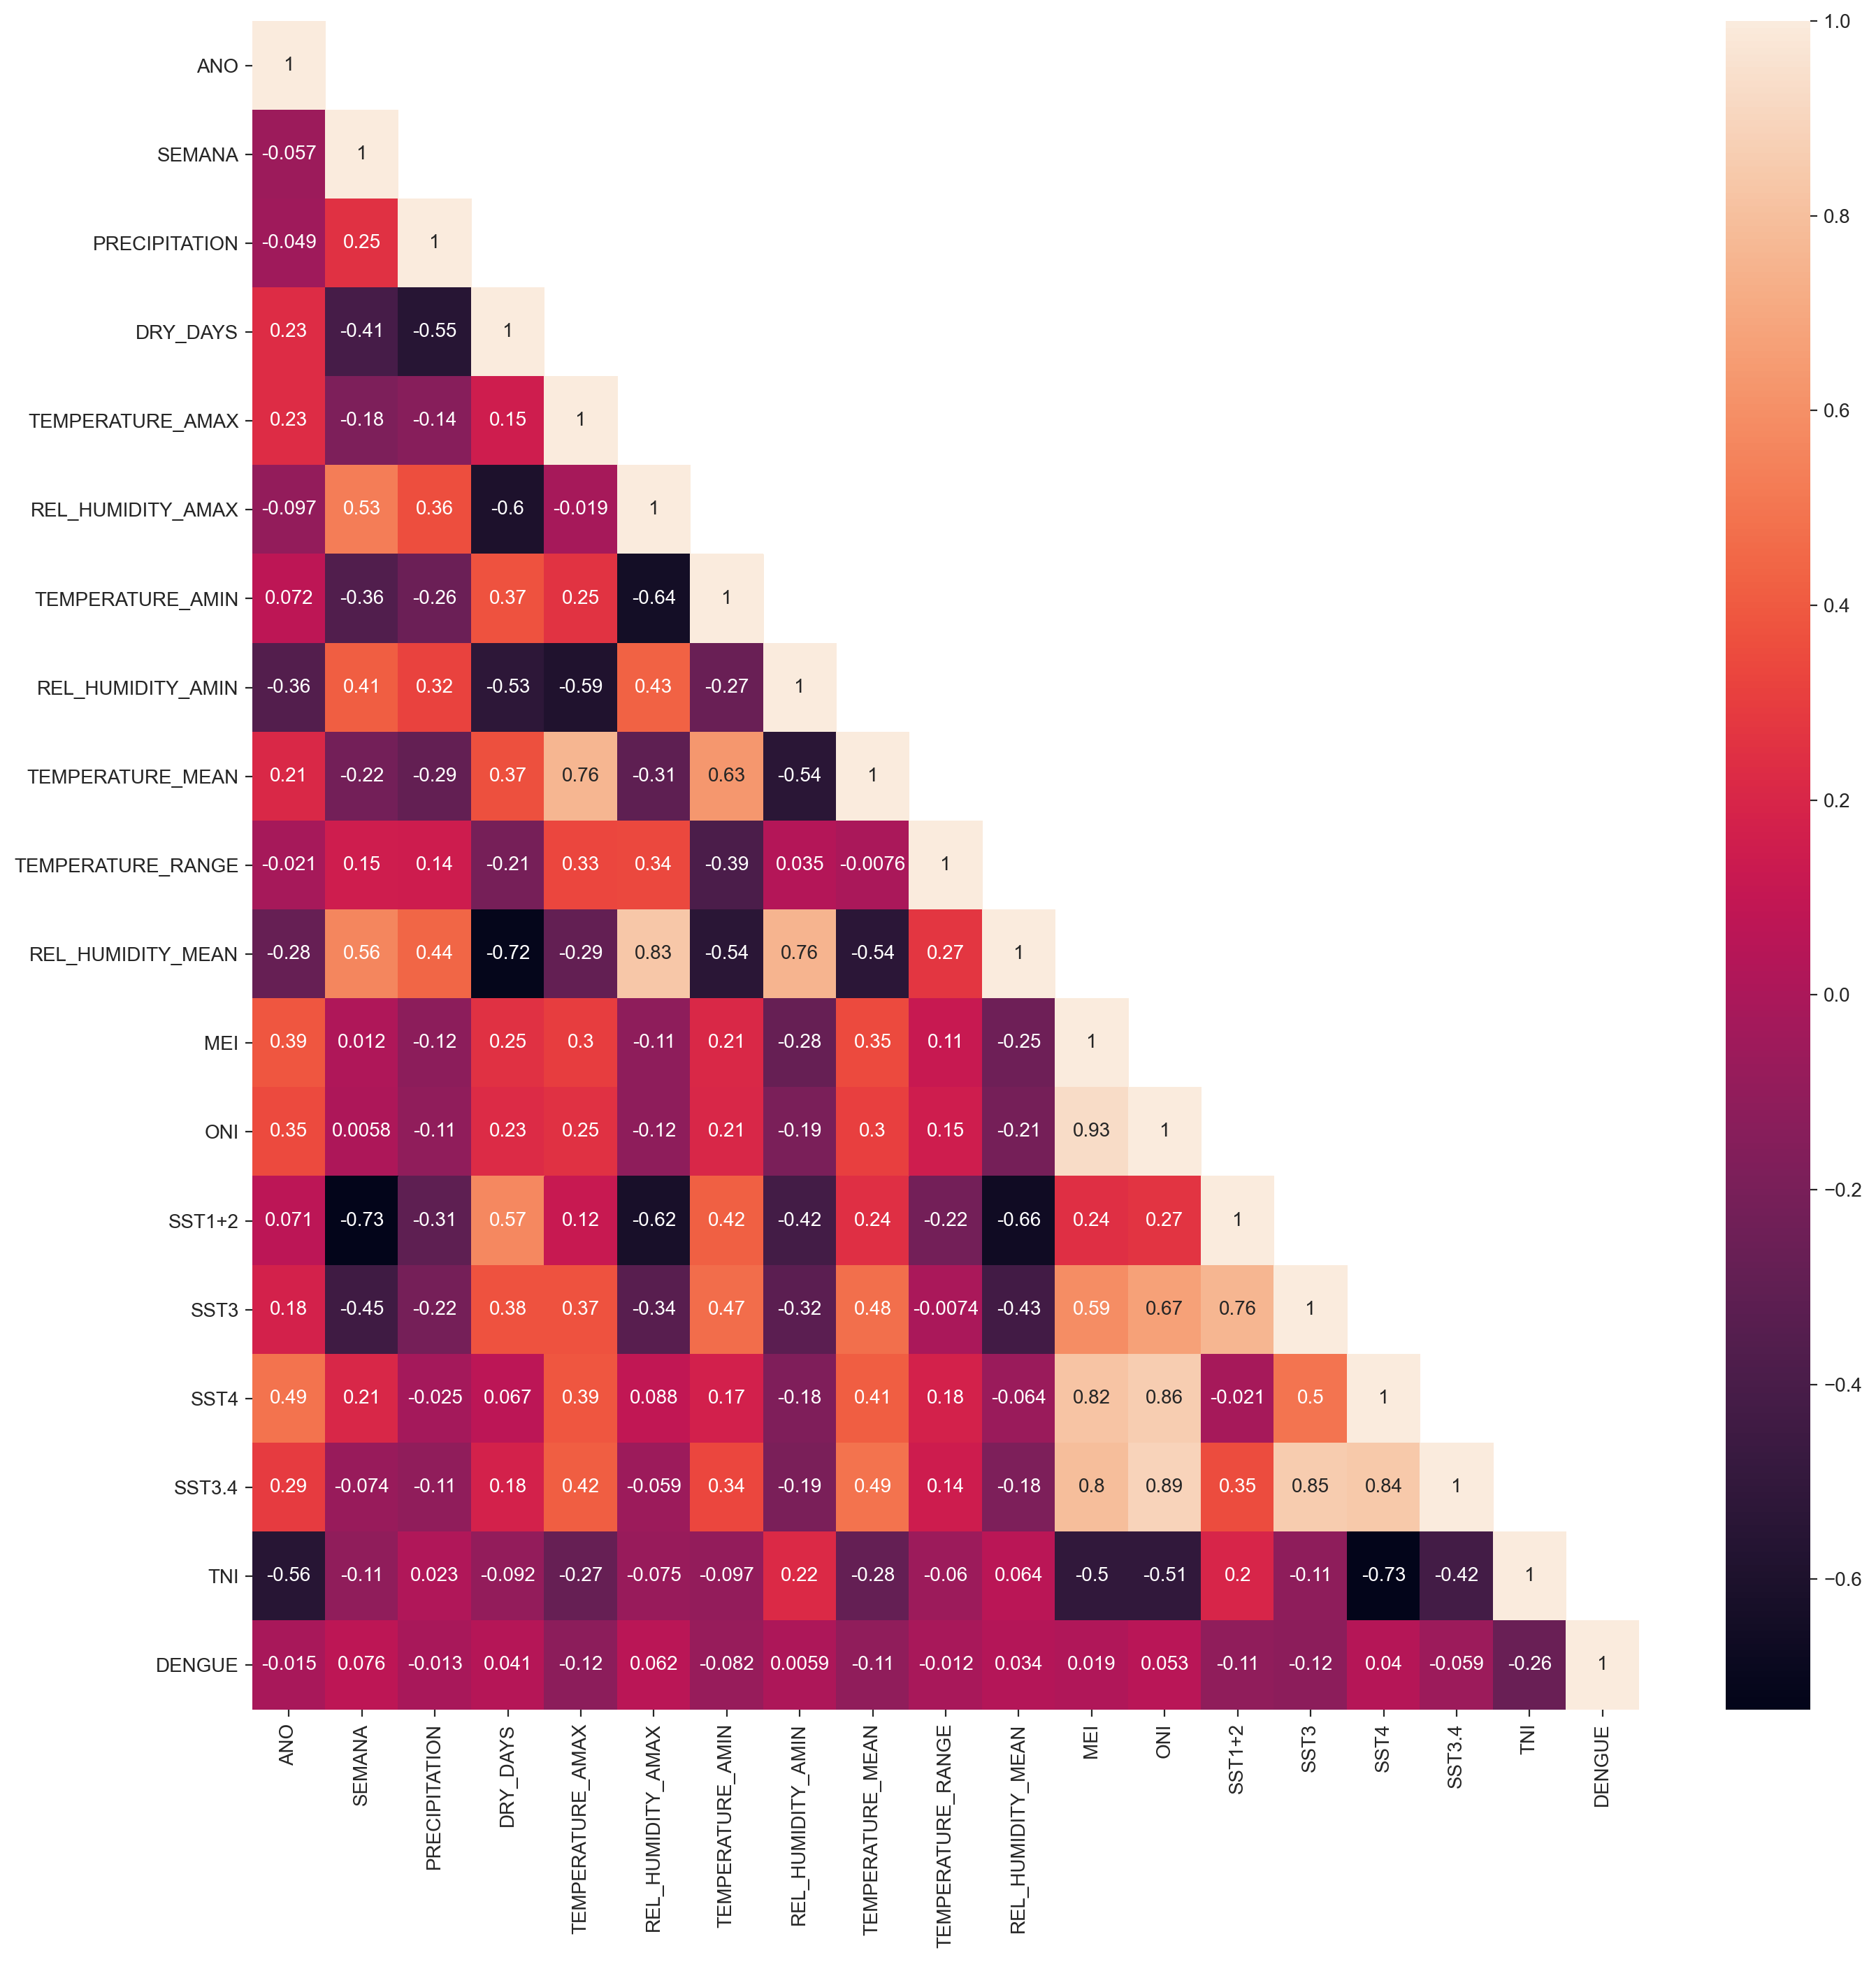

In [ ]:
fig, axs = plt.subplots(1,figsize=(16,16), dpi = 200)
corrMatrix = df_for_corr.corr()
corrMatrix = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))
sns.heatmap(corrMatrix, annot=True)
plt.show()

We see that some variables are quite correlated, so we could remove some of these. Interestingly, despite being the closest to Cali the SST for Region 1+2 has the weakest correlation with Dengue cases.

From the correlation matrix we see that variables such as: mean temperature, MEI, ONI, SST4, SST3.4 and TNI are the most correlated with the number of Dengue cases.

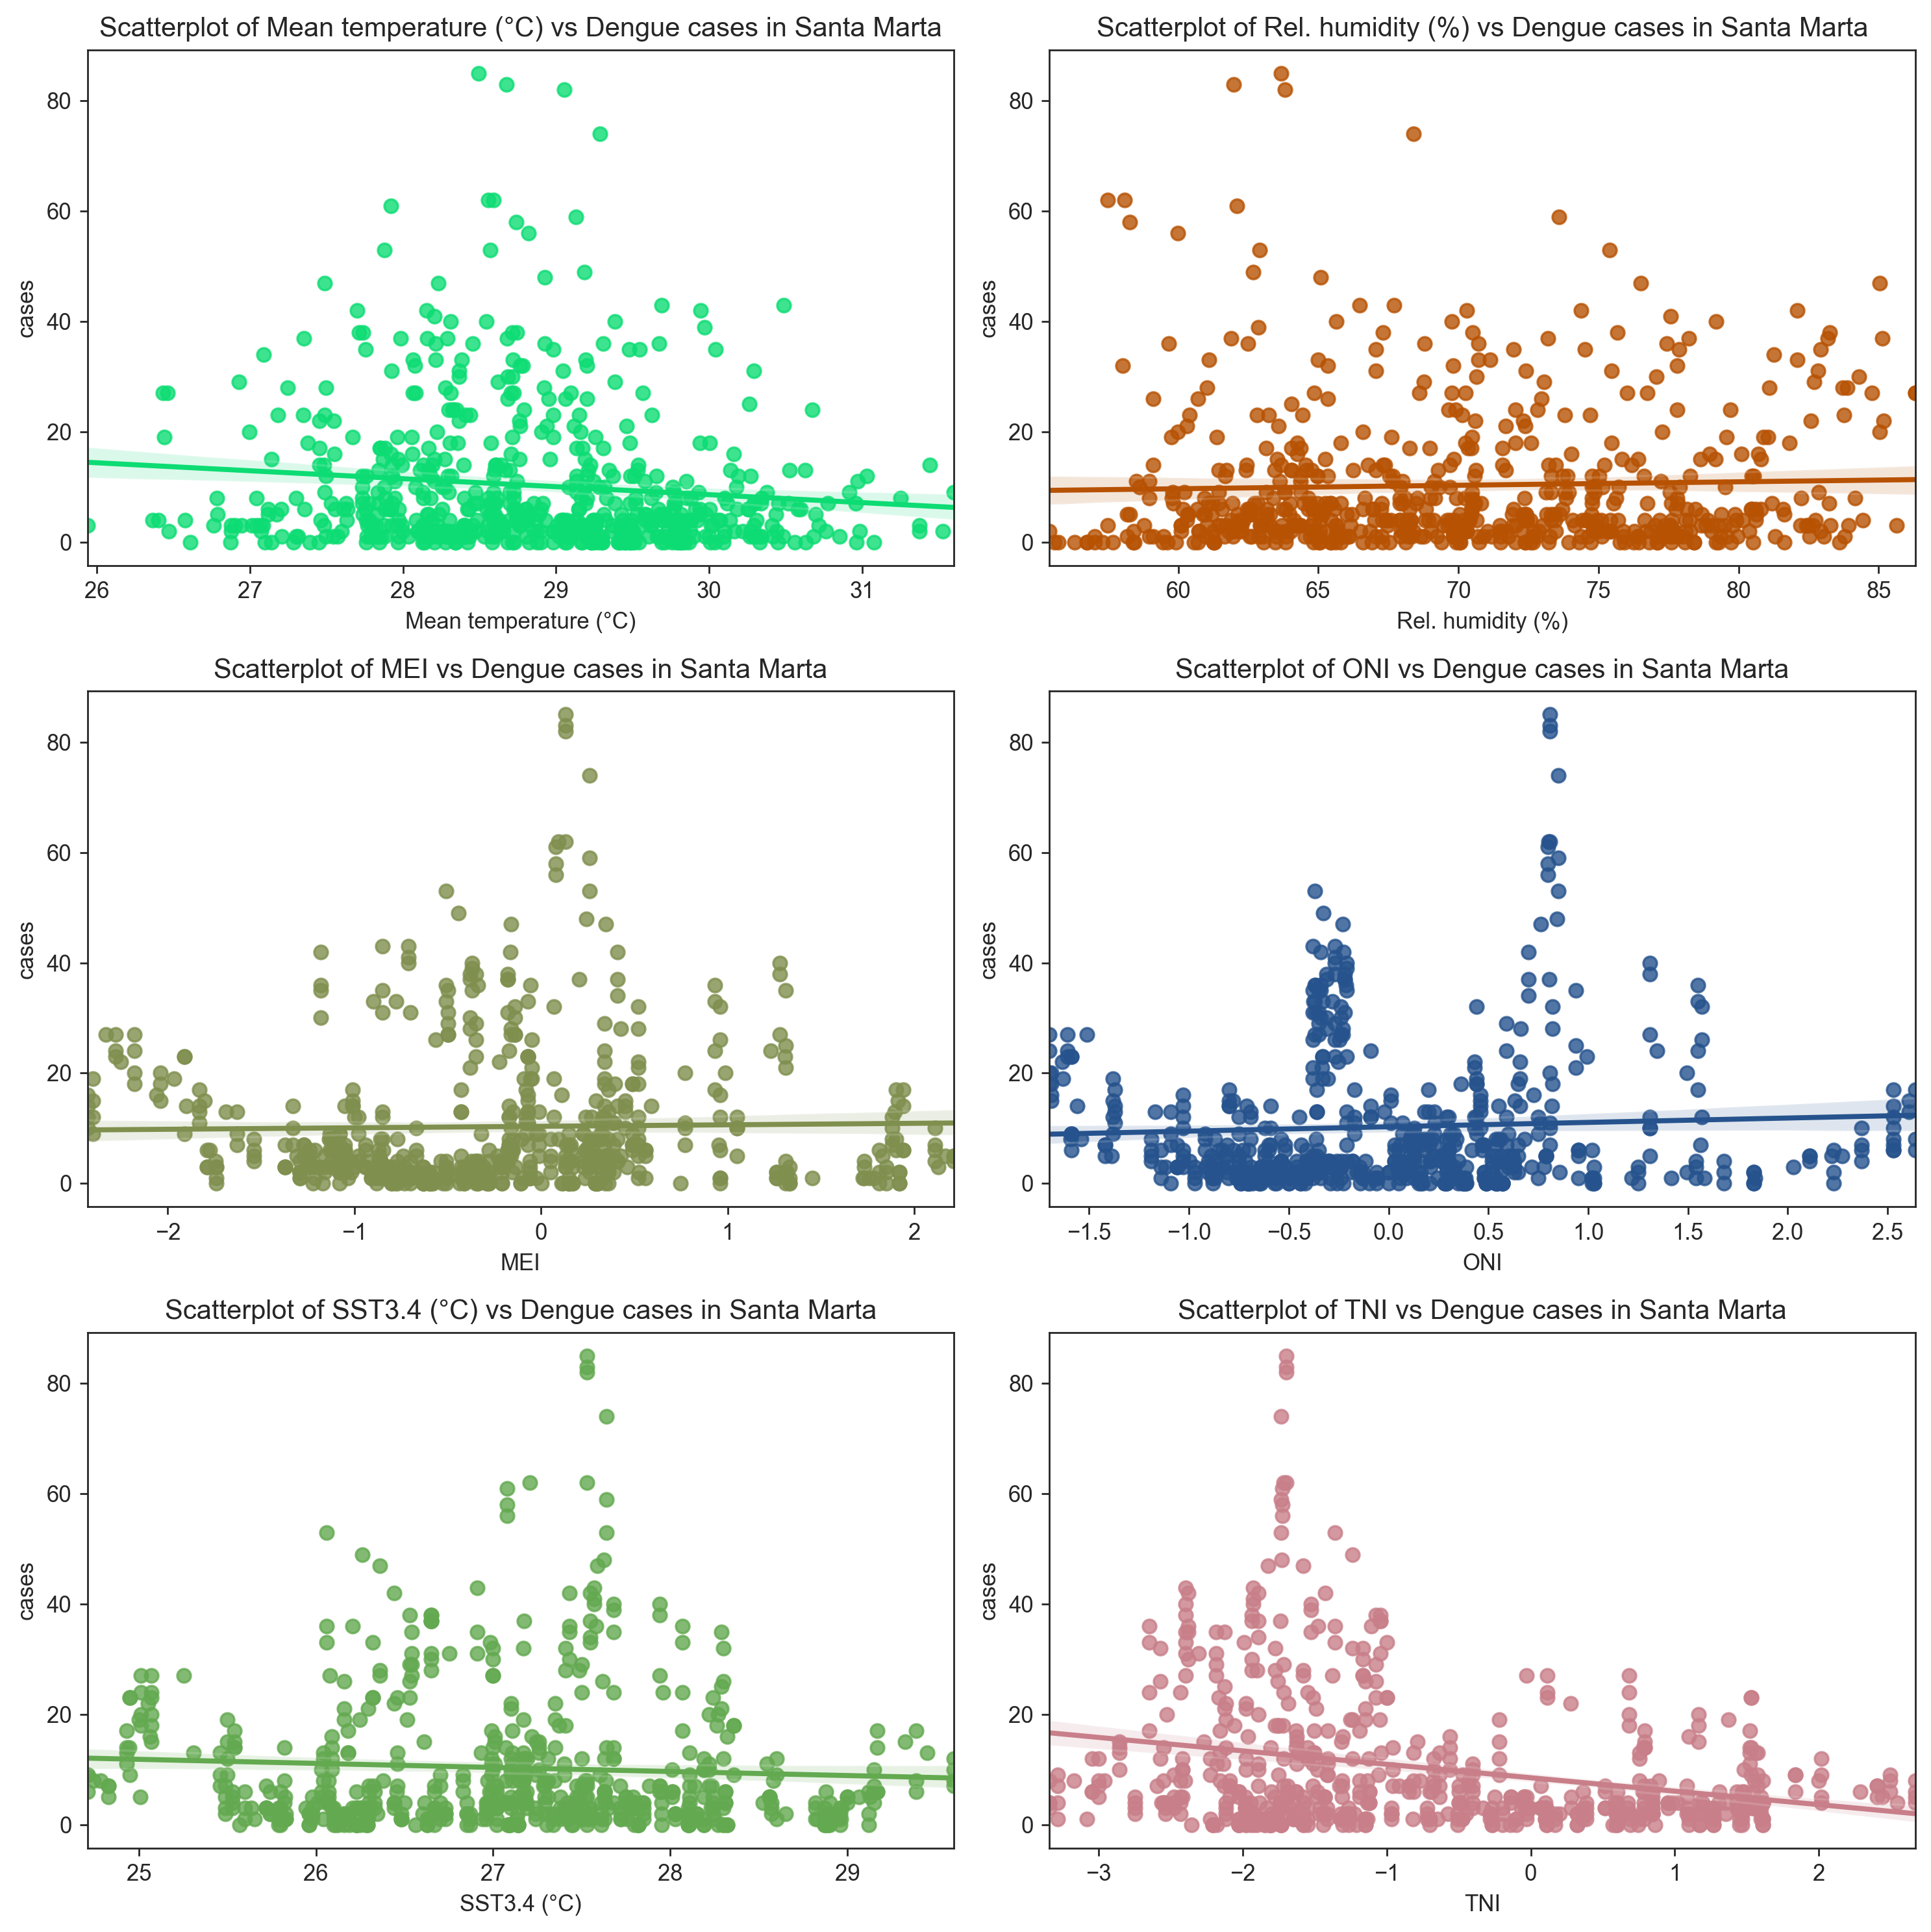

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(12,12), dpi = 250)
axes = axes.flatten()
vars_to_plot = ["TEMPERATURE_MEAN","REL_HUMIDITY_MEAN","MEI","ONI","SST3.4","TNI"]
xlabels  = ["Mean temperature (°C)","Rel. humidity (%)", "MEI", "ONI", "SST3.4 (°C)", "TNI"]
colors = list(mcolors.get_named_colors_mapping().keys())[99:105]
for i,var in enumerate(vars_to_plot):
    sns.regplot(x = df[var], y = df["DENGUE"], ax = axes[i], color = colors[i])
    axes[i].set_title("Scatterplot of "+xlabels[i]+" vs Dengue cases in " + municipality)
    axes[i].set_ylabel("cases")
    axes[i].set_xlabel(xlabels[i])
plt.tight_layout()

# CORRELATION OVER THE YEARS WITH DELAYS BETWEEN THE COVARIATES AND THE DENGUE CASES

In [ ]:
df.columns

Index(['COD_DPTO', 'COD_MUNICIPIO', 'POBLACION', 'ANO', 'SEMANA',
       'PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE'],
      dtype='object')

In order to calculate the correlation of dengue with the lagged covariates a function was created. This function guarantees that a correlation is calculated for each meteorological variable for a specific number of lags against dengue (`lag_size`).  

This function lags the meteorological covariate, but does not lag the dengue variable, and according to this data it calculates the respective correlation over time.

In [ ]:
def lagged_corr(weeks, var, window):
    return df[str(var)].shift(periods=weeks).iloc[weeks:].corr(df['DENGUE'].iloc[weeks:],
                                                            min_periods=window)
cols = ['PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE']

df_corr_melt = pd.melt(df.reset_index().reset_index(), id_vars='index', value_vars=cols)

The variables are kept to 24 lags, because after this period of time, usually the behavior starts repeating itself. This filter allows us to reduce the noise in the data.

In [ ]:
df_corr_melt.rename(columns={'index':'lag_size'}, inplace=True)
df_corr_melt = df_corr_melt[(df_corr_melt["lag_size"]<=16)&(df_corr_melt["lag_size"]>=4)]

In [ ]:
df_corr_melt['corr'] = df_corr_melt.apply(lambda x: lagged_corr(x.lag_size,
                                                          x.variable, 200), axis=1)

In [ ]:
df_corr_pivot = df_corr_melt.pivot_table(columns='lag_size', index='variable', values='corr')
row_max = np.abs(df_corr_pivot).idxmax(axis=1)
columns = row_max.index

In [ ]:
df_corr_pivot

lag_size                 4         5         6         7         8         9   \
variable                                                                        
DENGUE             0.839830  0.805457  0.767515  0.724537  0.674616  0.639004   
DRY_DAYS          -0.055977 -0.071472 -0.099301 -0.105036 -0.139979 -0.141713   
MEI                0.032201  0.035821  0.036435  0.039731  0.045664  0.050806   
ONI                0.060944  0.062028  0.059323  0.057965  0.056609  0.055833   
PRECIPITATION      0.071769  0.061359  0.114570  0.116853  0.127648  0.124862   
REL_HUMIDITY_AMAX  0.175893  0.196837  0.222042  0.238093  0.241336  0.258889   
REL_HUMIDITY_AMIN  0.071889  0.086786  0.094007  0.086146  0.078249  0.077379   
REL_HUMIDITY_MEAN  0.151265  0.168649  0.196420  0.203831  0.206936  0.208935   
SST1+2            -0.214379 -0.236435 -0.258739 -0.276299 -0.292376 -0.302758   
SST3              -0.152605 -0.156801 -0.163564 -0.166782 -0.170367 -0.170471   
SST3.4            -0.033098 -0.026717 -0.024738 -0.021091 -0.017819 -0.013729   
SST4               0.087929  0.098456  0.104697  0.111310  0.117701  0.122846   
TEMPERATURE_AMAX  -0.125252 -0.120702 -0.112708 -0.091611 -0.076445 -0.053194   
TEMPERATURE_AMIN  -0.140279 -0.132417 -0.144702 -0.144740 -0.139108 -0.134241   
TEMPERATURE_MEAN  -0.126647 -0.121175 -0.121550 -0.102501 -0.094630 -0.065338   
TEMPERATURE_RANGE -0.011606 -0.017357 -0.001864  0.009909  0.025465  0.019665   
TNI               -0.277530 -0.282256 -0.285661 -0.290919 -0.295446 -0.301695   

lag_size                 10        11        12        13        14        15  \
variable                                                                        
DENGUE             0.589318  0.536840  0.494008  0.453867  0.416114  0.382065   
DRY_DAYS          -0.136697 -0.156560 -0.135701 -0.138860 -0.113153 -0.113999   
MEI                0.054422  0.056309  0.058768  0.061361  0.061750  0.061413   
ONI                0.051773  0.047872  0.044238  0.043514  0.040494  0.037636   
PRECIPITATION      0.115657  0.126146  0.111243  0.092181  0.051428  0.036868   
REL_HUMIDITY_AMAX  0.271499  0.266526  0.257892  0.256042  0.242171  0.233430   
REL_HUMIDITY_AMIN  0.073701  0.062047  0.028948  0.011953 -0.016954 -0.023166   
REL_HUMIDITY_MEAN  0.218203  0.216198  0.184777  0.173388  0.151012  0.136719   
SST1+2            -0.313285 -0.317276 -0.320911 -0.321433 -0.316938 -0.307769   
SST3              -0.170476 -0.166542 -0.164745 -0.158541 -0.150725 -0.139238   
SST3.4            -0.012271 -0.008746 -0.006746 -0.000199  0.006256  0.014852   
SST4               0.123194  0.124102  0.125623  0.130402  0.132562  0.135252   
TEMPERATURE_AMAX  -0.033745 -0.007190  0.043935  0.074797  0.089841  0.107324   
TEMPERATURE_AMIN  -0.127730 -0.117297 -0.095954 -0.101373 -0.075040 -0.066422   
TEMPERATURE_MEAN  -0.056576 -0.041948  0.009940  0.030396  0.058497  0.070817   
TEMPERATURE_RANGE  0.033710  0.026734  0.044221  0.061335  0.058315  0.054132   
TNI               -0.306386 -0.311148 -0.314909 -0.319703 -0.323451 -0.326502   

lag_size                 16  
variable                     
DENGUE             0.347996  
DRY_DAYS          -0.087155  
MEI                0.059672  
ONI                0.036808  
PRECIPITATION      0.004130  
REL_HUMIDITY_AMAX  0.224565  
REL_HUMIDITY_AMIN -0.036853  
REL_HUMIDITY_MEAN  0.111309  
SST1+2            -0.295570  
SST3              -0.123616  
SST3.4             0.026533  
SST4               0.138613  
TEMPERATURE_AMAX   0.119968  
TEMPERATURE_AMIN  -0.045805  
TEMPERATURE_MEAN   0.105664  
TEMPERATURE_RANGE  0.050018  
TNI               -0.329000

In [ ]:
df_corr_melt.variable.unique()

array(['PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX',
       'REL_HUMIDITY_AMAX', 'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN',
       'TEMPERATURE_MEAN', 'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN',
       'MEI', 'ONI', 'SST1+2', 'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE'],
      dtype=object)

In [ ]:
df_corr_melt_sub = df_corr_melt[df_corr_melt['variable'].isin(('MEI', 'ONI', 'SST1+2', 'SST3', 'SST4', 'SST3.4', 'TNI'))]
# df_corr_melt_sub

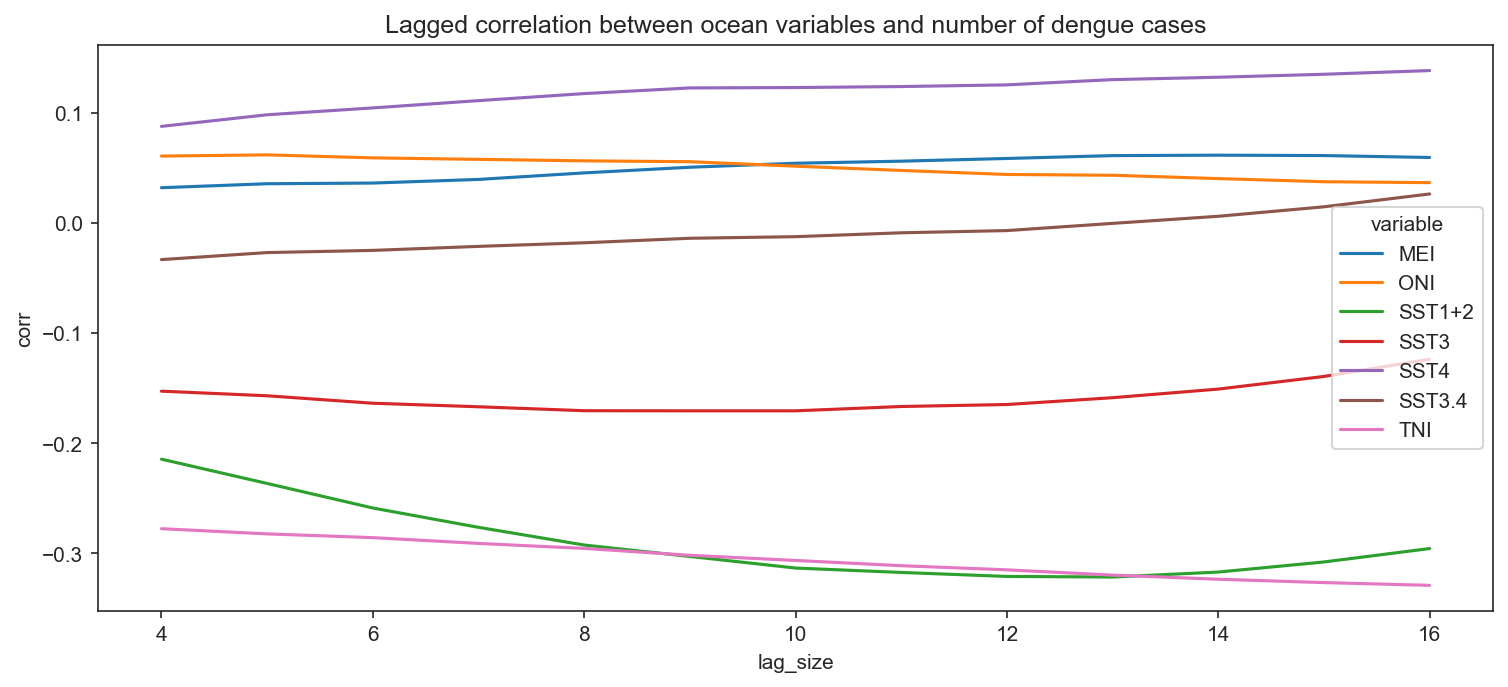

In [ ]:
fig, axs = plt.subplots(figsize = (12,5), dpi=150)
ax = sns.lineplot(x='lag_size', y='corr', data=df_corr_melt_sub, hue = 'variable').set_title('Lagged correlation between ocean variables and number of dengue cases')

In [ ]:
df_corr_melt_sub3 = df_corr_melt[df_corr_melt['variable'] == 'DENGUE']
# df_corr_melt_sub3

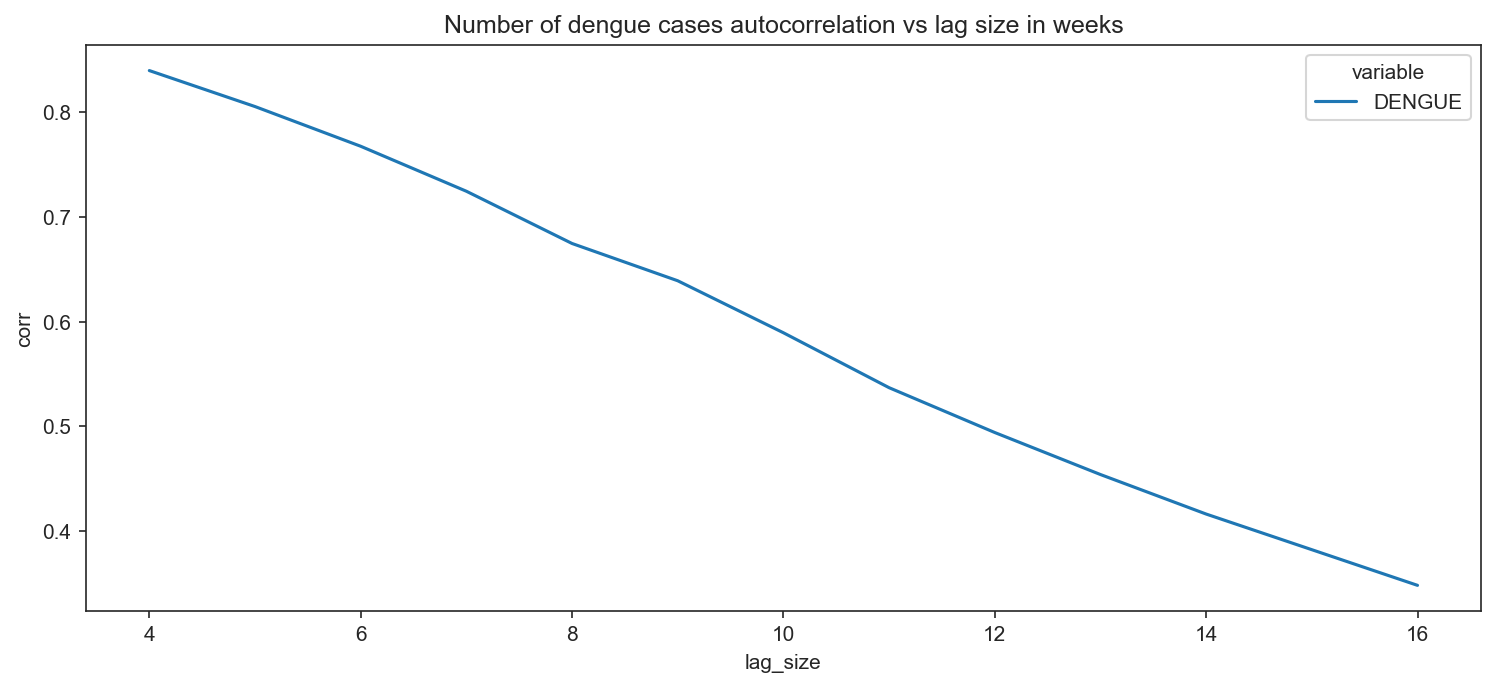

In [ ]:
fig, axs = plt.subplots(figsize = (12,5), dpi=150)
ax = sns.lineplot(x='lag_size', y='corr', data=df_corr_melt_sub3, hue = 'variable').set_title('Number of dengue cases autocorrelation vs lag size in weeks')

In [ ]:
df_corr_melt_sub2 = df_corr_melt[df_corr_melt['variable'].isin(('TEMPERATURE_MEAN', 'REL_HUMIDITY_MEAN', 'PRECIPITATION'))]
# df_corr_melt_sub2

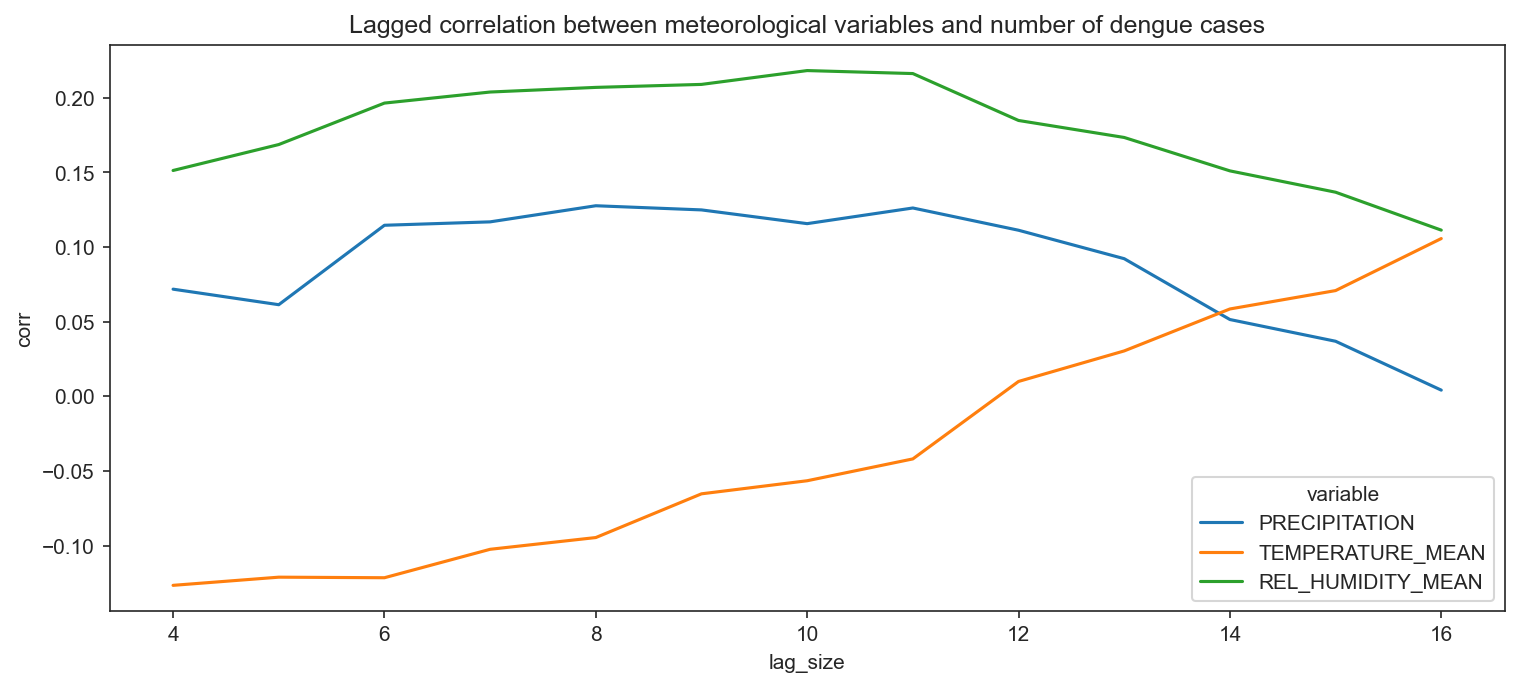

In [ ]:
fig, axs = plt.subplots(figsize = (12,5), dpi=150)
ax = sns.lineplot(x='lag_size', y='corr', data=df_corr_melt_sub2, hue = 'variable').set_title('Lagged correlation between meteorological variables and number of dengue cases')

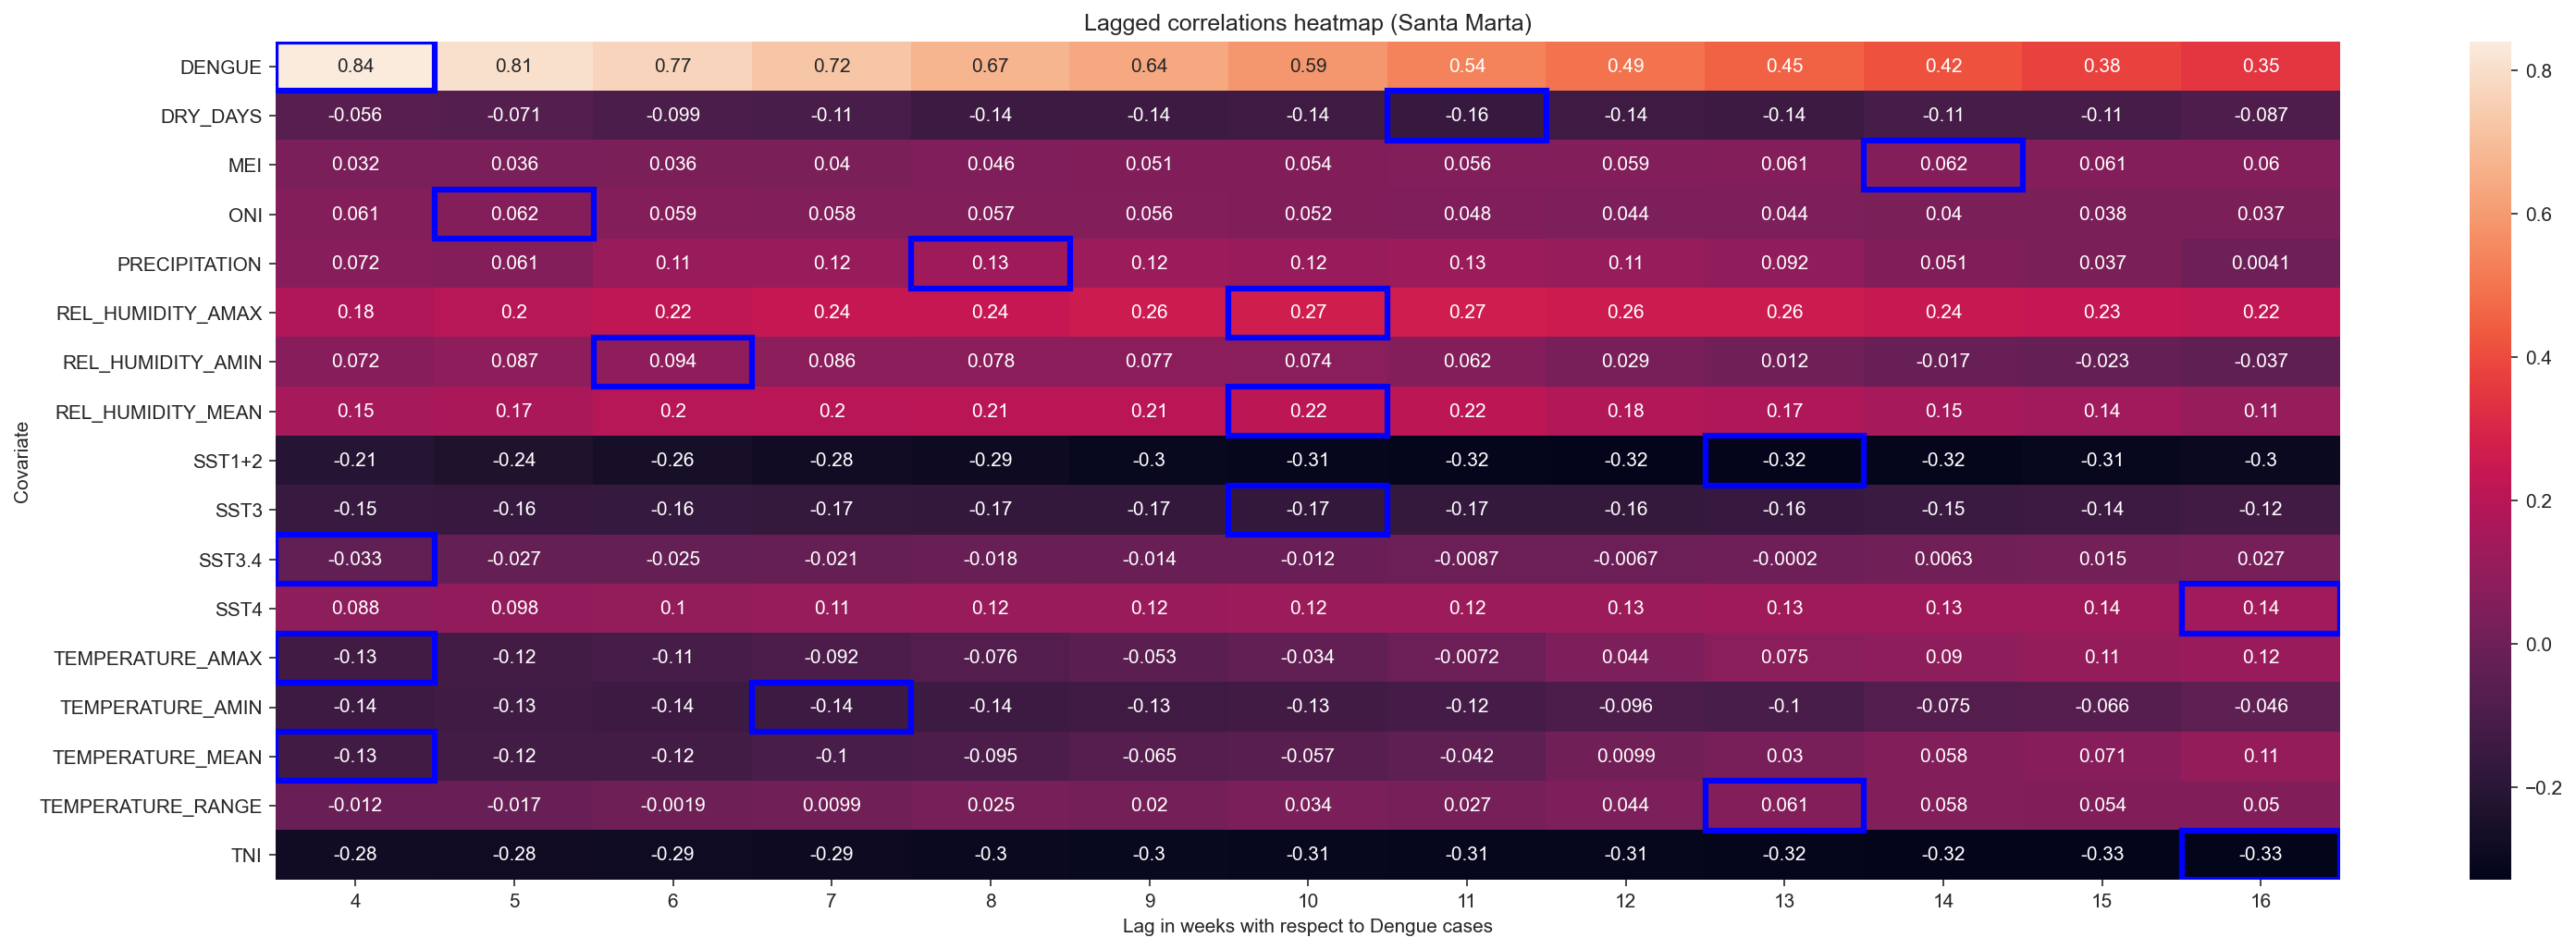

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(24,8), dpi = 150)
sns.heatmap(df_corr_pivot, annot = True, ax = ax)
ax.set_xlabel("Lag in weeks with respect to Dengue cases")
ax.set_title("Lagged correlations heatmap ({})".format(municipality))
ax.set_ylabel("Covariate");
for row, index in enumerate(columns):
    position = df_corr_pivot.columns.get_loc(row_max[index])
    ax.add_patch(Rectangle((position, row),1,1, fill=False, edgecolor='blue', lw=3))


The following function is done with the purpose of calculating the correlation between the meteorological variables and the lagged dengue, this variable is lagged up to 17 times and the `phases_confirmed` dataframe shows the result of this calculations.

In [ ]:
def obtener_conjunto_desfasado(datos,meses_desfase):
    dat_desfase = datos.copy().reset_index(drop=True)
    for i in range(len(dat_desfase)-meses_desfase):
        dat_desfase.loc[i,"DENGUE_UNPHASED"] = dat_desfase.loc[i+meses_desfase,"DENGUE"]
    quitar_filas = list(range(len(dat_desfase)-meses_desfase,len(dat_desfase)))
    dat_desfase= dat_desfase.drop(dat_desfase.index[quitar_filas])
    return dat_desfase

In [ ]:
df_for_corr_2 = df_for_corr[cols]
phases = [obtener_conjunto_desfasado(df_for_corr_2, i).corr(method='pearson').iloc[:,-1:] for i in range(17)]
phases_confirmed = pd.concat(phases, axis = 1)

In [ ]:
phases_confirmed